# IMPORTING LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

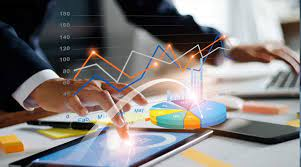

In [2]:
os.getcwd()

'C:\\Users\\Lenovo'

In [3]:
os.chdir('C:\\Users\\Lenovo\\Downloads')

In [4]:
data = pd.read_csv("full_bank_data.csv")

## EDA ##

In [5]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
data.shape

(45211, 17)

In [8]:
data.isnull().sum() #there is no nan value in data set

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
(data == "unknown").sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [13]:
target_no = (data['y']=="no").sum()
print("percentage_of_No==",target_no/45211*100,"%")

percentage_of_No== 88.30151954170445 %


In [14]:
target_yes = (data['y']=="yes").sum()
print("percentage_of_Yes==",target_yes/45211*100,"%")

percentage_of_Yes== 11.698480458295547 %


In [15]:
data.describe(include='all').style.background_gradient(cmap='Blues')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,nan,12,3,4,2,nan,2,2,3,nan,12,nan,nan,nan,nan,4,2
top,nan,blue-collar,married,secondary,no,nan,yes,no,cellular,nan,may,nan,nan,nan,nan,unknown,no
freq,nan,9732,27214,23202,44396,nan,25130,37967,29285,nan,13766,nan,nan,nan,nan,36959,39922
mean,40.936210,nan,nan,nan,nan,1362.272058,nan,nan,nan,15.806419,nan,258.163080,2.763841,40.197828,0.580323,nan,nan
std,10.618762,nan,nan,nan,nan,3044.765829,nan,nan,nan,8.322476,nan,257.527812,3.098021,100.128746,2.303441,nan,nan
min,18.000000,nan,nan,nan,nan,-8019.000000,nan,nan,nan,1.000000,nan,0.000000,1.000000,-1.000000,0.000000,nan,nan
25%,33.000000,nan,nan,nan,nan,72.000000,nan,nan,nan,8.000000,nan,103.000000,1.000000,-1.000000,0.000000,nan,nan
50%,39.000000,nan,nan,nan,nan,448.000000,nan,nan,nan,16.000000,nan,180.000000,2.000000,-1.000000,0.000000,nan,nan
75%,48.000000,nan,nan,nan,nan,1428.000000,nan,nan,nan,21.000000,nan,319.000000,3.000000,-1.000000,0.000000,nan,nan


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
data.duplicated().sum() #there no duplication in data_set

0

# DATA VISUVILAIZATION

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

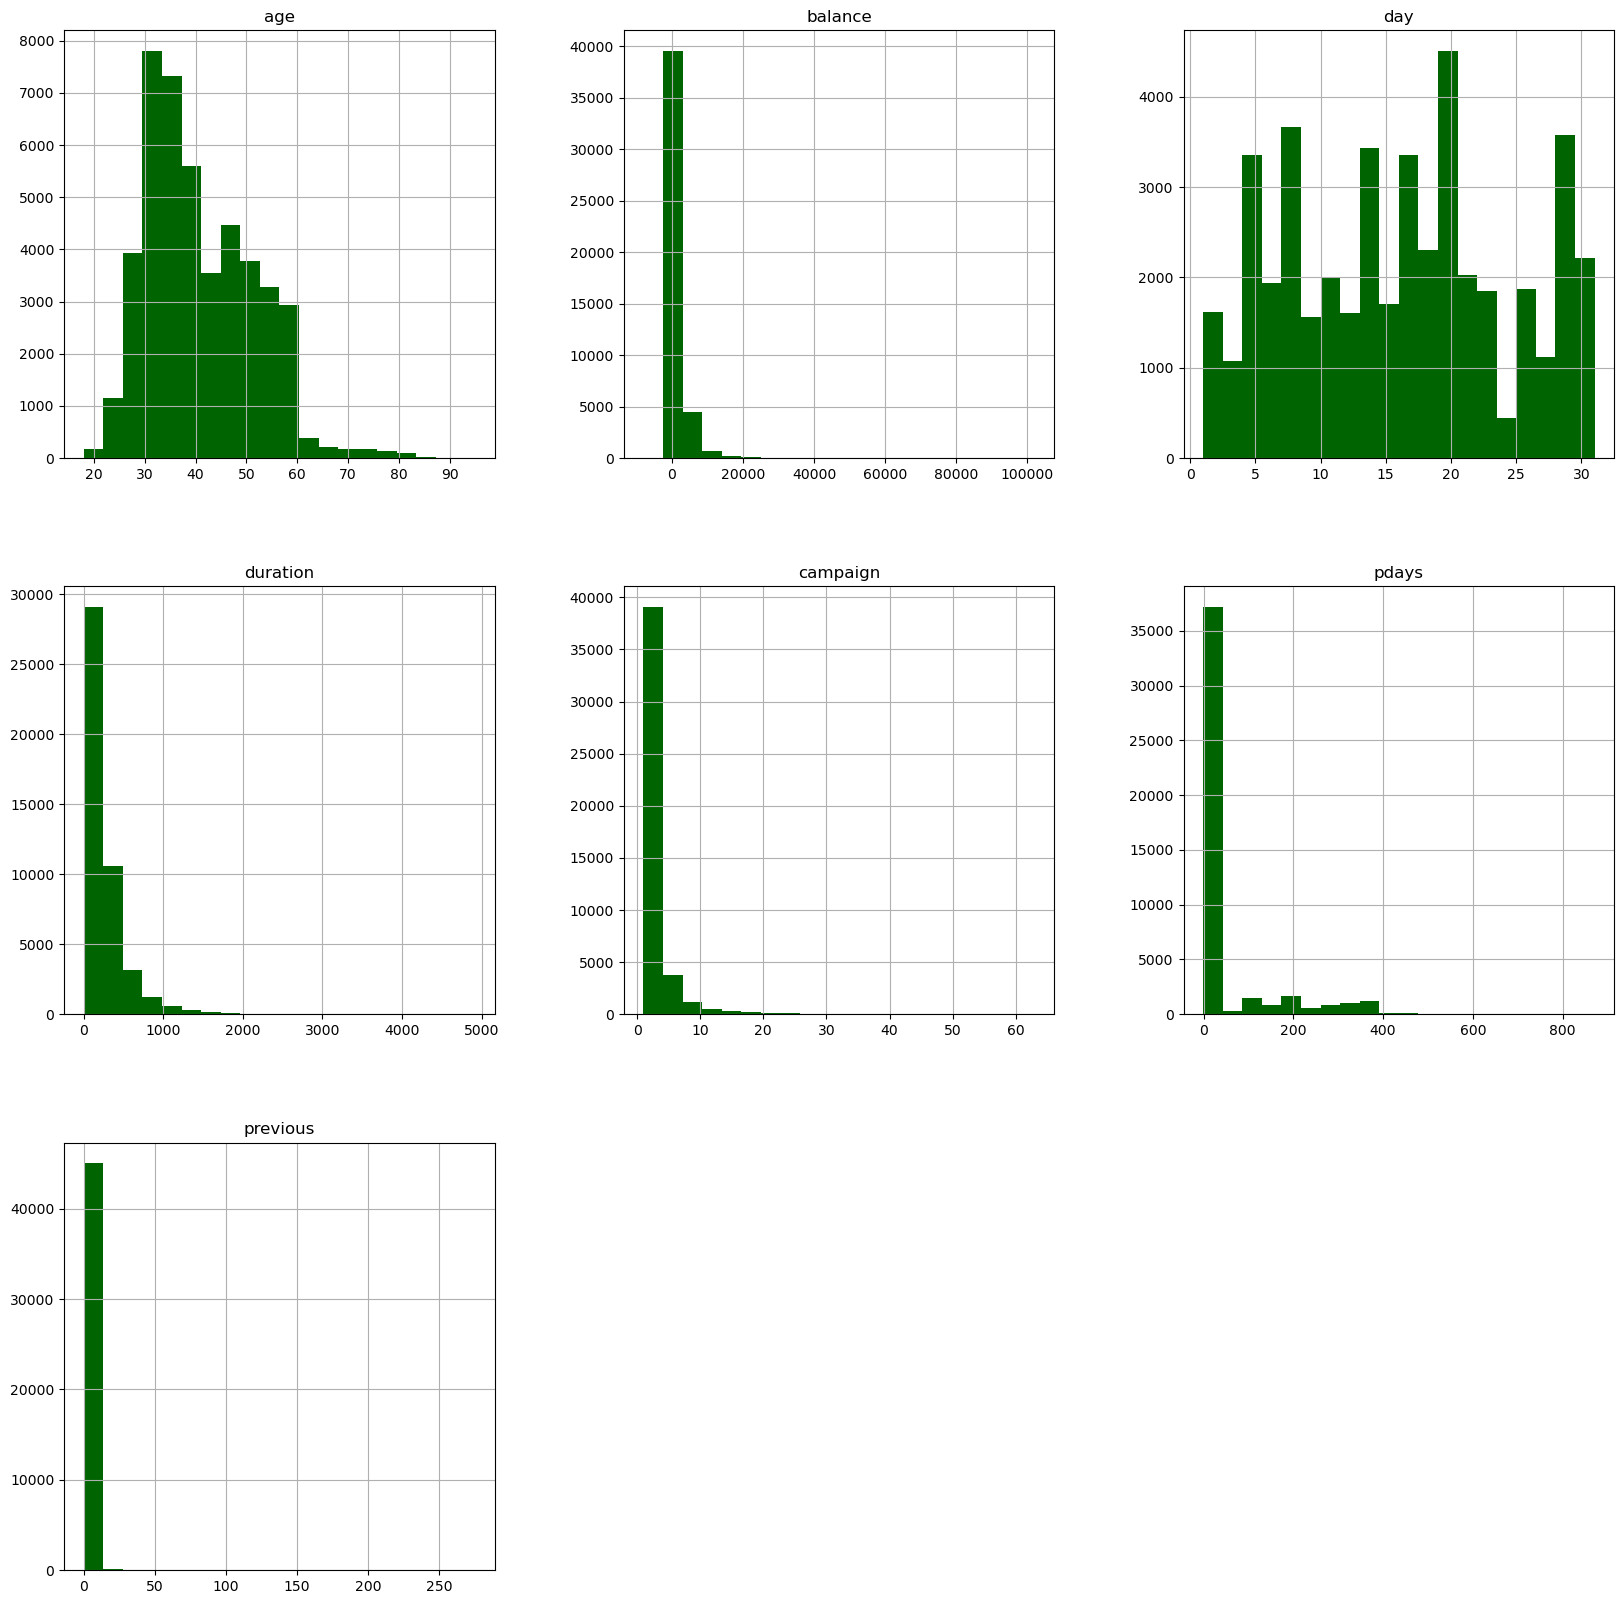

In [18]:
data.hist(bins=20,color='darkgreen',figsize=[20,20])

In [19]:
def pie_plot(data, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        data[col].value_counts().plot(ax=ax, kind='pie', figsize=(25,10), fontsize=12, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

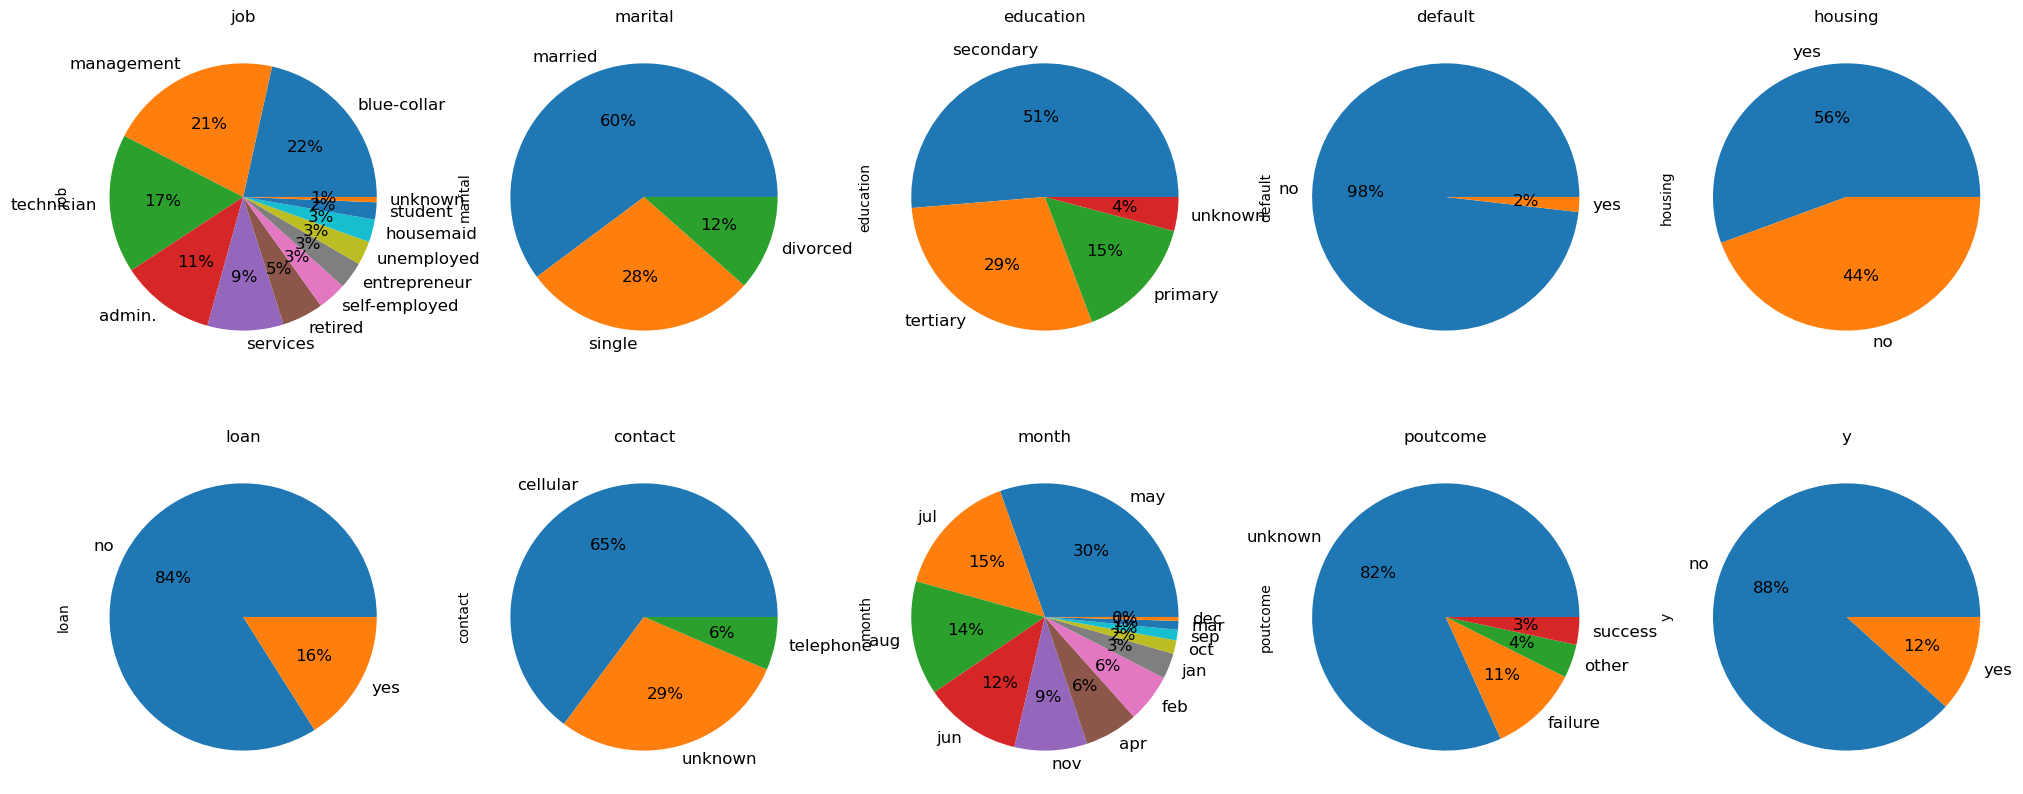

In [20]:
pie_plot(data,[ 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y'],2,5)

In [21]:
def scatter_features(l):
    g = sns.PairGrid(data,y_vars="y",x_vars=data[l].columns, height=5)
    g.map(plt.scatter,color='darkgreen',alpha=0.2)
    plt.show()

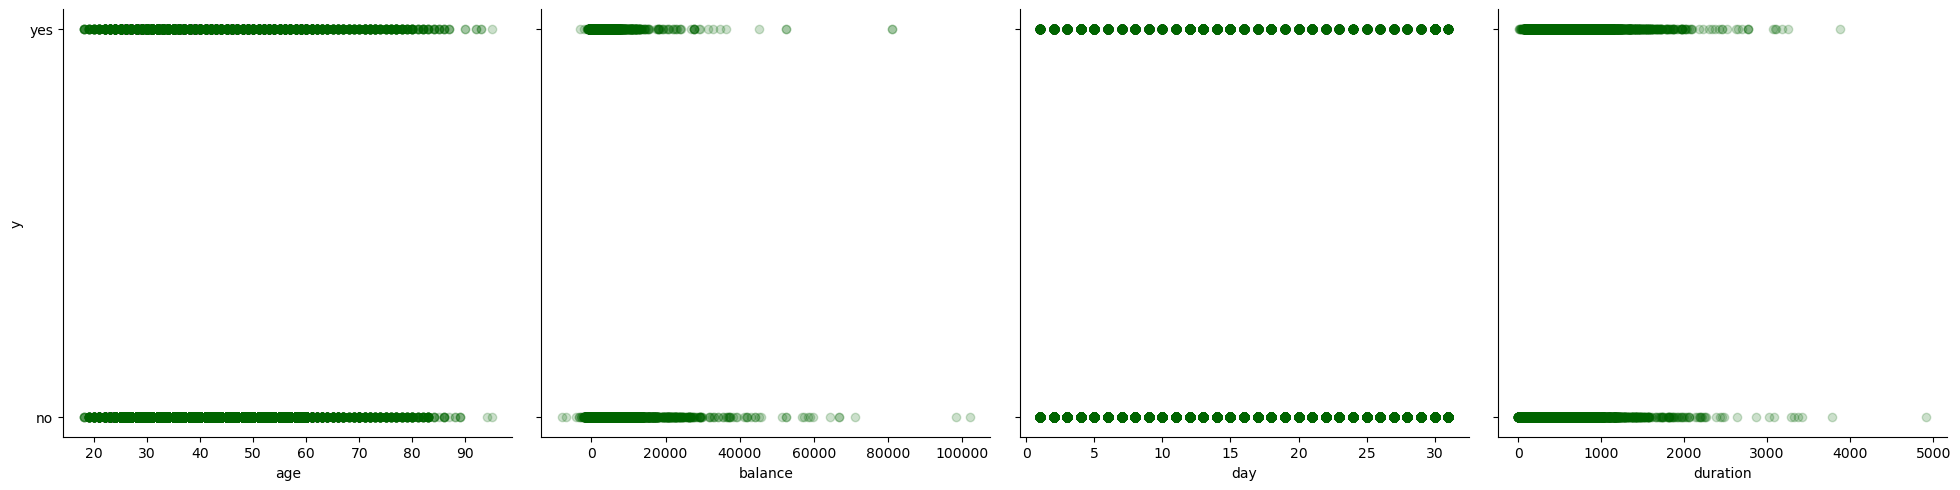

In [22]:
scatter_features(['age','balance','day','duration'])

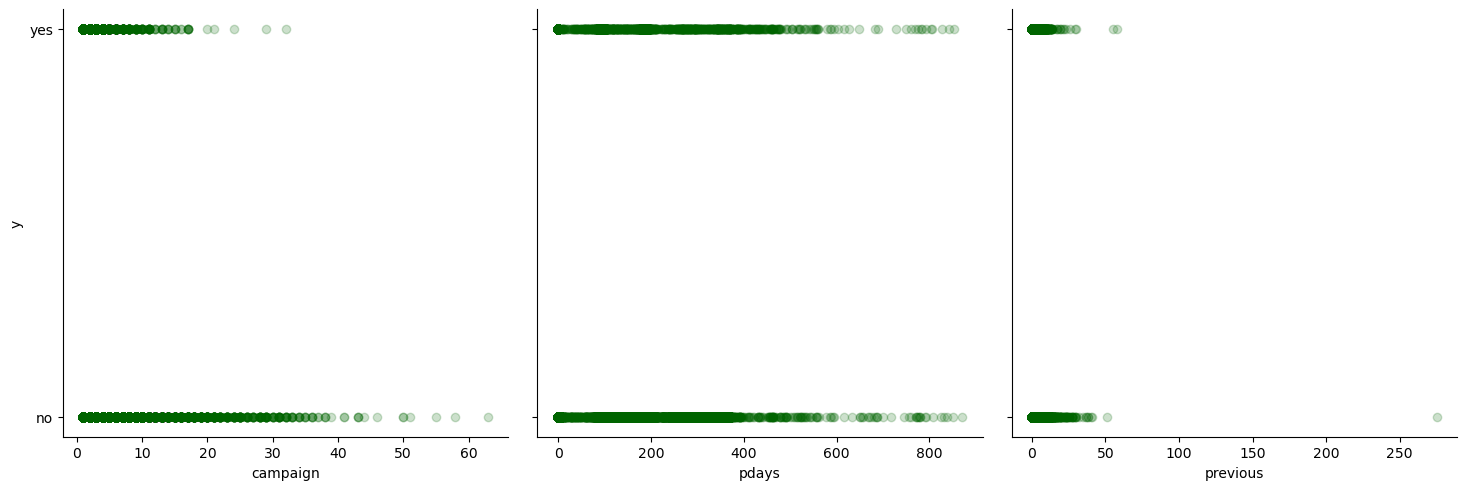

In [23]:
scatter_features(['campaign','pdays','previous'])

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])

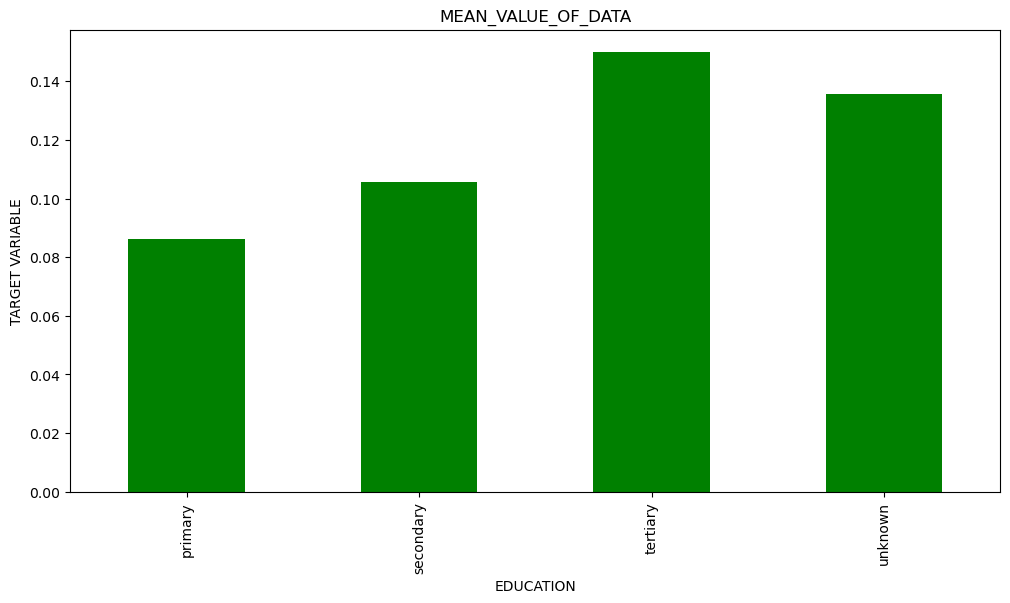

In [25]:
category_mean_diff = data.groupby('education')['y'].mean()

# Create a bar plot
category_mean_diff.plot(kind='bar', figsize=(12, 6),color='g')
plt.xlabel('EDUCATION')
plt.ylabel('TARGET VARIABLE')
plt.title('MEAN_VALUE_OF_DATA')
plt.xticks(rotation=90) 
plt.show()

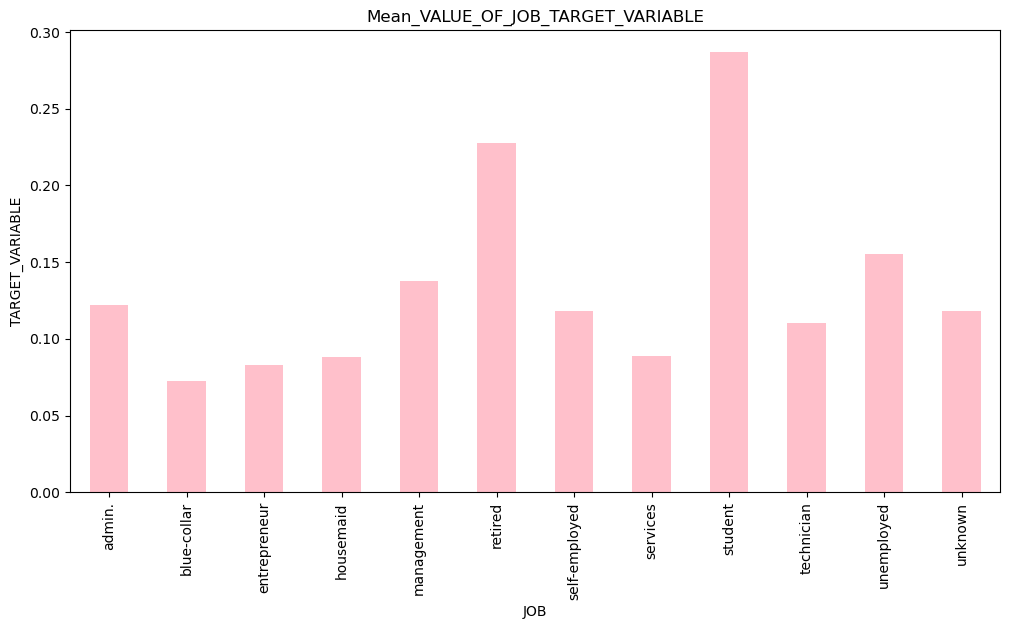

In [26]:
category_mean_diff = data.groupby('job')['y'].mean()

# Create a bar plot
category_mean_diff.plot(kind='bar', figsize=(12, 6),color='PINK')
plt.xlabel('JOB')
plt.ylabel('TARGET_VARIABLE')
plt.title('Mean_VALUE_OF_JOB_TARGET_VARIABLE')
plt.xticks(rotation=90) 
plt.show()

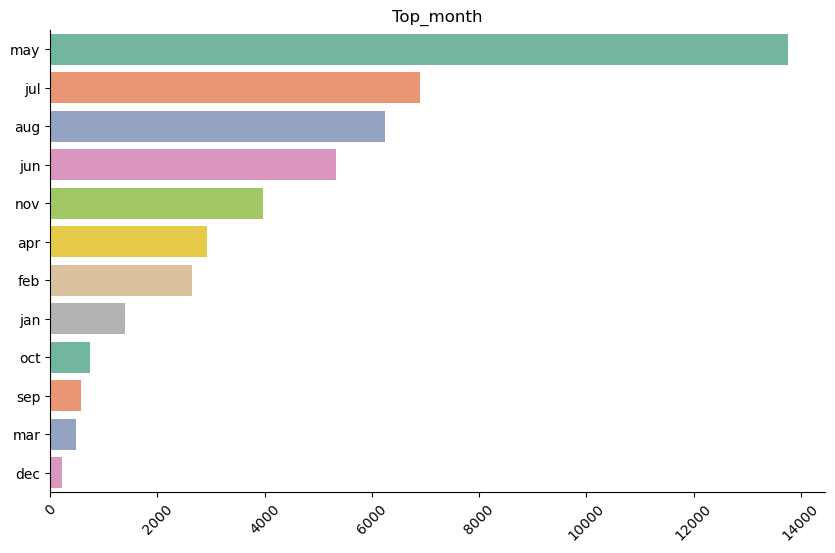

In [27]:
plt.figure(figsize=[10, 6])
sns.barplot(x = data['month'].value_counts().values, y = data['month'].value_counts().index, palette= 'Set2')
plt.title('Top_month')
plt.xticks(rotation = 45)
sns.despine()

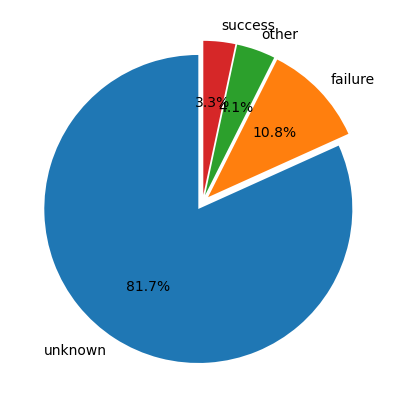

In [28]:
plt.figure(figsize=[5,5])
plt.pie(data['poutcome'].value_counts().values,
        explode=(0.05, 0.05, 0.05, 0.05),
        labels= data['poutcome'].value_counts().index,
        autopct='%1.1f%%',
        shadow=False,
        startangle=90
       );

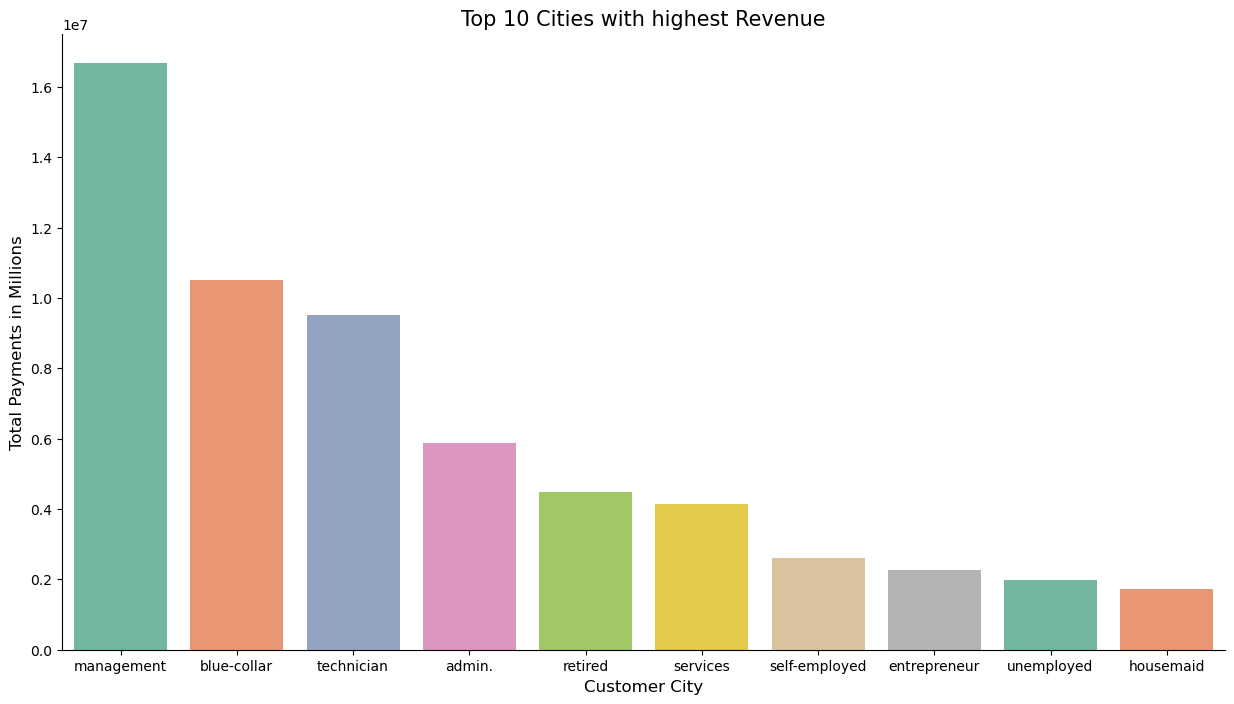

In [30]:
catocary_job = data.groupby('job')[['balance']].sum().sort_values(by='balance', ascending=False)
catocary_job.reset_index(inplace=True)
# plot Top 10 cities with highest revenue
plt.figure(figsize=[15, 8])
sns.barplot(x = catocary_job.job[:10], y= catocary_job.balance[:10], palette= 'Set2')
plt.title('Top 10 Cities with highest Revenue', fontsize= 15)
plt.xlabel('Customer City', fontsize= 12)
plt.ylabel('Total Payments in Millions',fontsize= 12)
sns.despine()

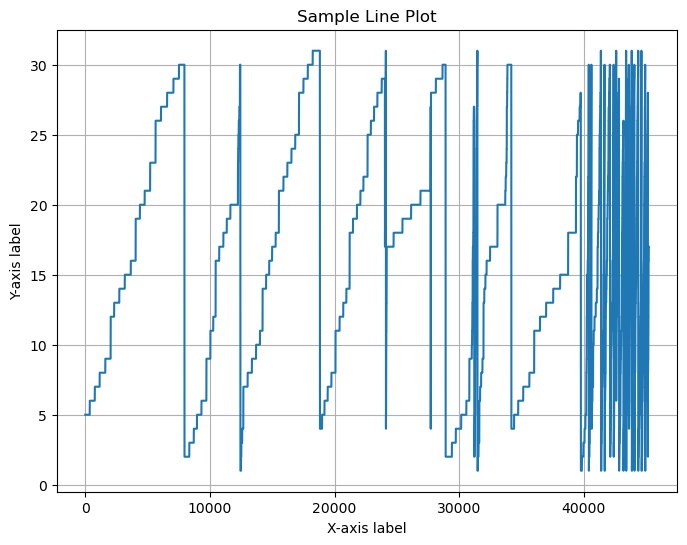

In [32]:
plt.figure(figsize=(8, 6))
sns.lineplot(data['day'])
plt.title('Sample Line Plot')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.grid(True)  # Display grid
plt.show()

In [33]:
def box_plot(num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sns.boxplot(data[l], palette="flare")

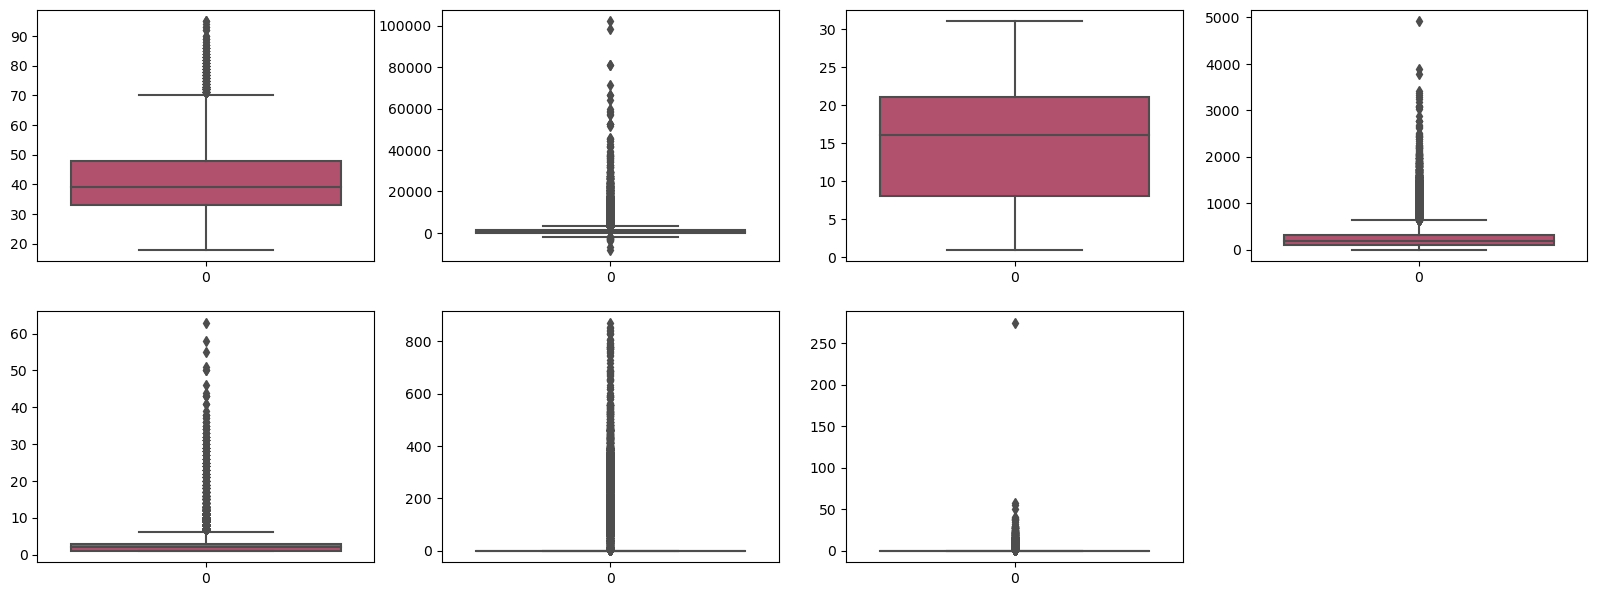

In [34]:
box_plot(['age','balance','day','duration','campaign','pdays','previous'])
#there huge outliers in dataset

# LABEL_ENCODING

In [35]:
df = data.copy()

In [36]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
ce_t= ce.TargetEncoder()
le = LabelEncoder()

In [37]:
df = pd.get_dummies(df,columns=['loan','housing','default'])

In [38]:
df['job'] = ce_t.fit_transform(df['job'],df['y'])
df['poutcome']= ce_t.fit_transform(df['poutcome'],df['y'])


In [39]:
df['marital'] = le.fit_transform(df['marital'])
df['education']= le.fit_transform(df['education'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])

In [40]:
df

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,y,loan_no,loan_yes,housing_no,housing_yes,default_no,default_yes
0,58,0.137556,1,2,2143,2,5,8,261,1,-1,0,0.091615,0,1,0,0,1,1,0
1,44,0.110570,2,1,29,2,5,8,151,1,-1,0,0.091615,0,1,0,0,1,1,0
2,33,0.082717,1,1,2,2,5,8,76,1,-1,0,0.091615,0,0,1,0,1,1,0
3,47,0.072750,1,3,1506,2,5,8,92,1,-1,0,0.091615,0,1,0,0,1,1,0
4,33,0.118056,2,3,1,2,5,8,198,1,-1,0,0.091615,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0.110570,1,2,825,0,17,9,977,3,-1,0,0.091615,1,1,0,1,0,1,0
45207,71,0.227915,0,0,1729,0,17,9,456,2,-1,0,0.091615,1,1,0,1,0,1,0
45208,72,0.227915,1,1,5715,0,17,9,1127,5,184,3,0.647253,1,1,0,1,0,1,0
45209,57,0.072750,1,1,668,1,17,9,508,4,-1,0,0.091615,0,1,0,1,0,1,0


# DATA NORMALIZATION

In [41]:
dc = df.copy()

In [42]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn import preprocessing

In [43]:
ds = dc[['age','balance','day','duration','campaign','pdays','previous']].copy()

In [44]:
scaler = preprocessing.RobustScaler()
robust = scaler.fit_transform(ds)
robust = pd.DataFrame(robust)

In [45]:
scaler_m  = preprocessing.MinMaxScaler()
min_max = scaler_m.fit_transform(ds)
min_max = pd.DataFrame(min_max)

In [46]:
scaler_s = preprocessing.StandardScaler()
standard= scaler_s.fit_transform(ds)
standard = pd.DataFrame(standard)
standard

,0,1,2,3,4,5,6
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940


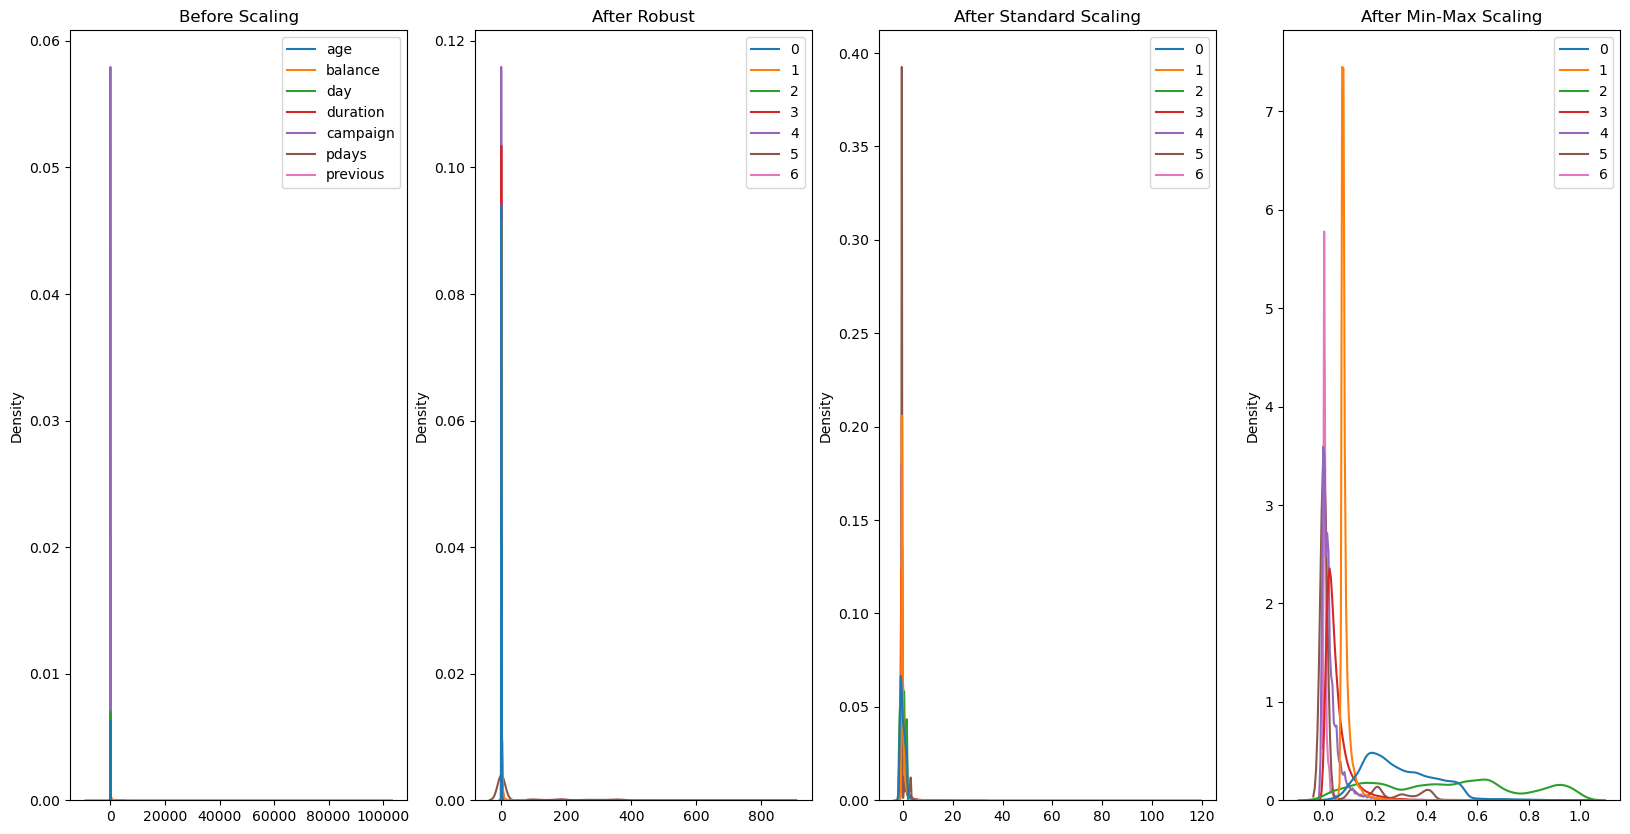

In [47]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 10))
ax1.set_title('Before Scaling')
sns.kdeplot(ds, ax = ax1, color ='b')
ax2.set_title('After Robust')

sns.kdeplot(robust, ax = ax2, color ='g')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard, ax = ax3, color ='b')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(min_max, ax = ax4, color ='g')
plt.show()
# after visualizing that min-max Scaling is Better

In [48]:
def min_maxScaling(df_num, cols):
    scaler = preprocessing.MinMaxScaler()
    min_max = scaler_s.fit_transform(ds)
    min_max = pd.DataFrame(min_max, columns =cols)
    return min_max

In [49]:
min_max_s = min_maxScaling(ds,['age','balance','day','duration','campaign','pdays','previous'])

In [51]:
clean_ds = dc.copy()
clean_ds.drop(labels=['age','balance','day','duration','campaign','pdays','previous'],axis=1,inplace=True)
clean_ds[['age','balance','day','duration','campaign','pdays','previous']]=min_max_s[['age','balance','day','duration','campaign','pdays','previous']]

In [52]:
clean_ds

,job,marital,education,contact,month,poutcome,y,loan_no,loan_yes,housing_no,housing_yes,default_no,default_yes,age,balance,day,duration,campaign,pdays,previous
0,0.137556,1,2,2,8,0.091615,0,1,0,0,1,1,0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940
1,0.110570,2,1,2,8,0.091615,0,1,0,0,1,1,0,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940
2,0.082717,1,1,2,8,0.091615,0,0,1,0,1,1,0,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940
3,0.072750,1,3,2,8,0.091615,0,1,0,0,1,1,0,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940
4,0.118056,2,3,2,8,0.091615,0,1,0,1,0,1,0,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.110570,1,2,0,9,0.091615,1,1,0,1,0,1,0,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940
45207,0.227915,0,0,0,9,0.091615,1,1,0,1,0,1,0,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940
45208,0.227915,1,1,0,9,0.647253,1,1,0,1,0,1,0,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473
45209,0.072750,1,1,1,9,0.091615,0,1,0,1,0,1,0,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940


# MODEL SAMPLING

In [53]:
ds1 = clean_ds[0:6459]
ds2 = clean_ds[6460:12918]
ds3 = clean_ds[12919:19376]
ds4 = clean_ds[19377:25834]
ds5 = clean_ds[25835:32292]
ds6 =  clean_ds[32293:38750]
ds7 = clean_ds[38751:45211]
ds7

,job,marital,education,contact,month,poutcome,y,loan_no,loan_yes,housing_no,housing_yes,default_no,default_yes,age,balance,day,duration,campaign,pdays,previous
38751,0.088830,2,1,0,8,0.091615,0,1,0,0,1,1,0,-1.783298,-0.365310,0.263576,-0.548153,0.076230,-0.411453,-0.251940
38752,0.088830,1,1,0,8,0.091615,1,1,0,0,1,1,0,-0.182341,-0.408992,0.263576,3.004901,-0.246560,-0.411453,-0.251940
38753,0.072750,2,1,0,8,0.091615,0,1,0,0,1,1,0,-1.218254,-0.391257,0.263576,1.028393,-0.246560,-0.411453,-0.251940
38754,0.072750,2,1,0,8,0.091615,0,1,0,0,1,1,0,-1.594950,-0.445449,0.263576,-0.940348,2.335762,-0.411453,-0.251940
38755,0.088830,2,1,0,8,0.126097,0,1,0,0,1,1,0,-1.500776,-0.493729,0.263576,-0.563685,-0.246560,3.074098,0.616335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.110570,1,2,0,9,0.091615,1,1,0,1,0,1,0,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940
45207,0.227915,0,0,0,9,0.091615,1,1,0,1,0,1,0,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940
45208,0.227915,1,1,0,9,0.647253,1,1,0,1,0,1,0,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473
45209,0.072750,1,1,1,9,0.091615,0,1,0,1,0,1,0,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940


In [54]:
x1 = ds1.copy()
x1.drop(columns=['y'],axis=1,inplace=True)

In [55]:
y1 = ds1.iloc[:,[6]]

In [56]:
x2 = ds2.copy()
x2.drop(columns=['y'],axis=1,inplace=True)
y2 = ds2.iloc[:,[6]]

In [57]:
x3 = ds3.copy()
x3.drop(columns=['y'],axis=1,inplace=True)
y3 = ds3.iloc[:,[6]]

In [58]:
x4 = ds4.copy()
x4.drop(columns=['y'],axis=1,inplace=True)
y4 = ds4.iloc[:,[6]]

In [59]:
x5 = ds5.copy()
x5.drop(columns=['y'],axis=1,inplace=True)
y5 = ds5.iloc[:,[6]]

In [60]:
x6 = ds6.copy()
x6.drop(columns=['y'],axis=1,inplace=True)
y6 = ds6.iloc[:,[6]]

In [61]:
x7 = ds7.copy()
x7.drop(columns=['y'],axis=1,inplace=True)
y7 = ds7.iloc[:,[6]]

# MODELING

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,precision_score,recall_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import multilabel_confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=9)

In [64]:
def model_evaluation(model,name,x_test,y_test):
    report = classification_report(y_test,model.predict(x_test),zero_division=1)
    accuracy_scor = accuracy_score(model.predict(x_test),y_test)
    print(report)
    print(name,"accuracy_score=",accuracy_scor*100)

In [65]:
def conf_matrixs(y_test,model,x_test,cmap,normalize=None,plot=True,encoded_labels=True):
    y_pred = model.predict(x_test)
    conf_mat = confusion_matrix(y_test,y_pred,normalize=None,labels=[0,1])   
    ax = sns.heatmap(conf_mat, cmap=cmap, square=True, cbar=False, annot=True, fmt='g')
    ax.set_title('confution_matrics')
    ax.set_xlabel('prediction')
    ax.set_ylabel('Actual')
    return conf_mat

In [66]:
def plot_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
    plt.figure(figsize=(7,5))
    plt.plot(df[:33])
    plt.legend(['Actual' , 'Predicted'])

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

def custom_roc_curve(model_name, x_train_label, x_test_label, y_train_label, y_test_label):
    # Assuming you have already trained and fit the logistic regression model (model_kt)
    score = {}
    
    # Predict probabilities on the training and test sets
    y_probs_train = model_name.predict_proba(x_train_label)[:, 1]
    y_probs_test = model_name.predict_proba(x_test_label)[:, 1]

    # Predictions on the training and test sets
    y_predicted_train = model_name.predict(x_train_label)
    y_predicted_test = model_name.predict(x_test_label)

    # Calculate AUC and Accuracy
    train_auc = roc_auc_score(y_train_label, y_probs_train)
    test_auc = roc_auc_score(y_test_label, y_probs_test)
    train_acc = accuracy_score(y_train_label, y_predicted_train)
    test_acc = accuracy_score(y_test_label, y_predicted_test)

    print('*' * 50)
    print('Train AUC: %.3f' % train_auc)
    print('Test AUC: %.3f' % test_auc)
    print('*' * 50)
    print('Train Accuracy: %.3f' % train_acc)
    print('Test Accuracy: %.3f' % test_acc)

    # Store the results in a dictionary or any other data structure as needed
    score['Logistic Regression'] = [test_auc, test_acc]

    # Calculate ROC curve
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train_label, y_probs_train)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test_label, y_probs_test)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
    plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()

# K-NEAREST NEABOUR

ITERATION 1

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1254
           1       0.50      0.18      0.27        38

    accuracy                           0.97      1292
   macro avg       0.74      0.59      0.63      1292
weighted avg       0.96      0.97      0.96      1292

KNeighborsClassifier accuracy_score= 97.05882352941177


array([[1247,    7],
       [  31,    7]], dtype=int64)

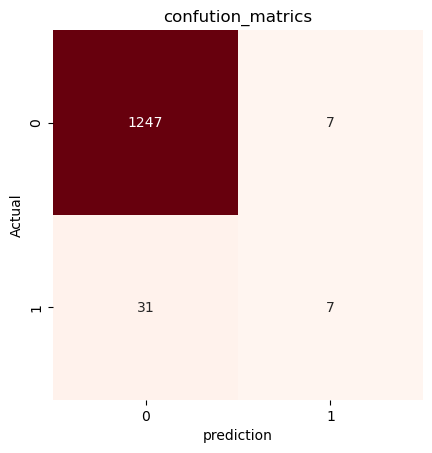

In [68]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
model_k1 = KNeighborsClassifier(n_neighbors=5,p=2)
model_k1.fit(x_train,y_train)
model_evaluation(model_k1,"KNeighborsClassifier",x_test,y_test)
conf_matrixs(y_test,model_k1,x_test,cmap='Reds',normalize=None,plot=True,encoded_labels=True)


**************************************************
Train AUC: 0.983
Test AUC: 0.857
**************************************************
Train Accuracy: 0.976
Test Accuracy: 0.971


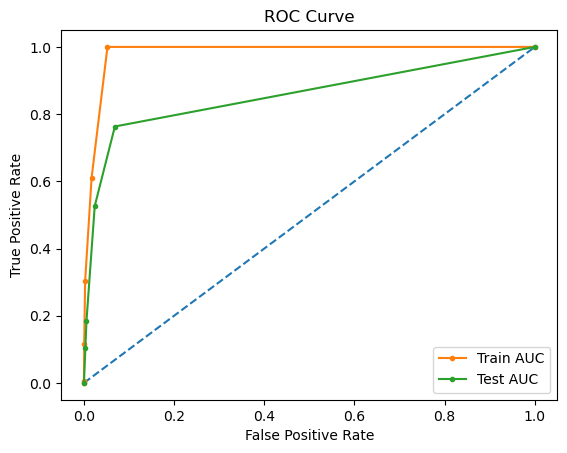

In [69]:
custom_roc_curve(model_k1,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1254
           1       0.40      0.32      0.35        38

    accuracy                           0.97      1292
   macro avg       0.69      0.65      0.67      1292
weighted avg       0.96      0.97      0.96      1292

KNeighborsClassifier accuracy_score= 96.59442724458205


array([[1236,   18],
       [  26,   12]], dtype=int64)

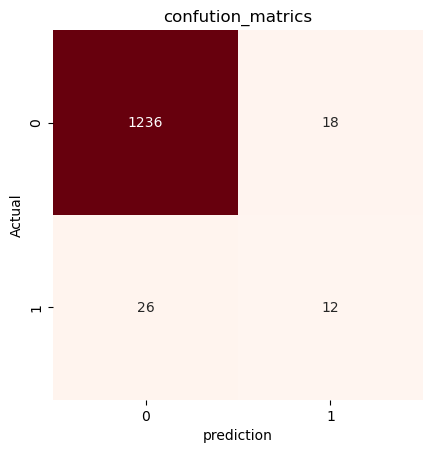

In [74]:
y2 = y2.values.ravel()
model_k1 = KNeighborsClassifier(n_neighbors=5,p=2)
model_k1.fit(x2,y2)
model_evaluation(model_k1,"KNeighborsClassifier",x_test,y_test)
conf_matrixs(y_test,model_k1,x_test,cmap='Reds',normalize=None,plot=True,encoded_labels=True)


**************************************************
Train AUC: 0.883
Test AUC: 0.852
**************************************************
Train Accuracy: 0.931
Test Accuracy: 0.923


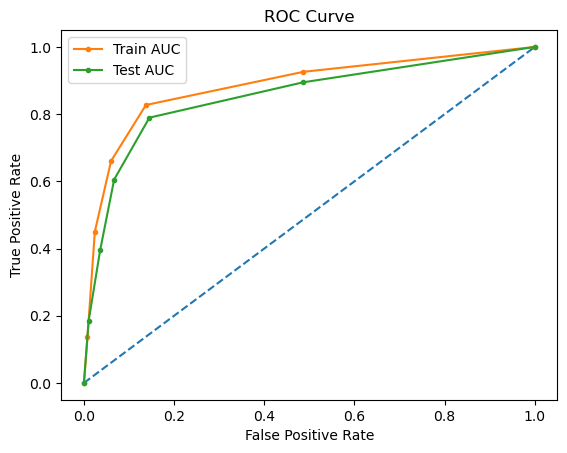

In [80]:
custom_roc_curve(model_k1,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1254
           1       0.42      0.29      0.34        38

    accuracy                           0.97      1292
   macro avg       0.70      0.64      0.66      1292
weighted avg       0.96      0.97      0.96      1292

KNeighborsClassifier accuracy_score= 96.74922600619195


array([[1239,   15],
       [  27,   11]], dtype=int64)

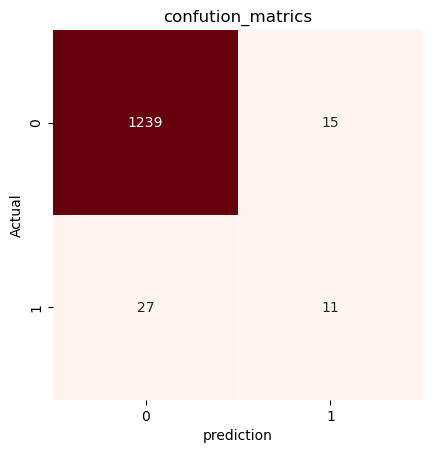

In [75]:
y3 = y3.values.ravel()
model_k1 = KNeighborsClassifier(n_neighbors=5,p=2)
model_k1.fit(x3,y3)
model_evaluation(model_k1,"KNeighborsClassifier",x_test,y_test)
conf_matrixs(y_test,model_k1,x_test,cmap='Reds',normalize=None,plot=True,encoded_labels=True)


**************************************************
Train AUC: 0.883
Test AUC: 0.852
**************************************************
Train Accuracy: 0.931
Test Accuracy: 0.923


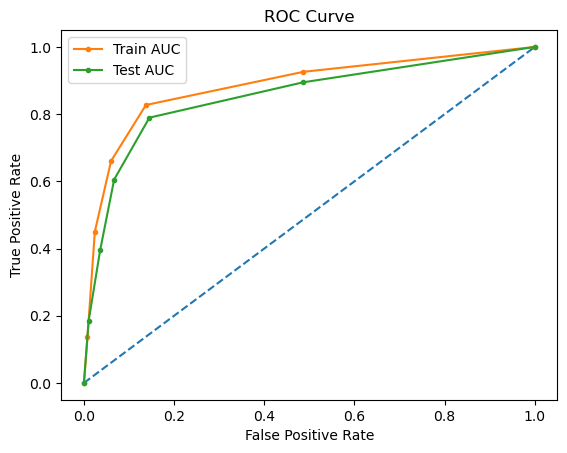

In [81]:
custom_roc_curve(model_k1,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1254
           1       0.04      0.18      0.06        38

    accuracy                           0.83      1292
   macro avg       0.50      0.52      0.48      1292
weighted avg       0.94      0.83      0.88      1292

KNeighborsClassifier accuracy_score= 83.04953560371517


array([[1066,  188],
       [  31,    7]], dtype=int64)

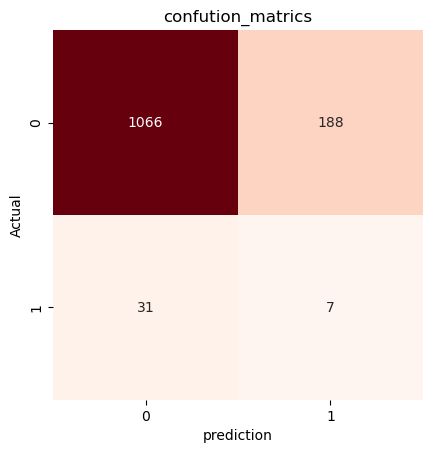

In [76]:
y4 = y4.values.ravel()
model_k1 = KNeighborsClassifier(n_neighbors=5,p=2)
model_k1.fit(x4,y4)
model_evaluation(model_k1,"KNeighborsClassifier",x_test,y_test)
conf_matrixs(y_test,model_k1,x_test,cmap='Reds',normalize=None,plot=True,encoded_labels=True)


**************************************************
Train AUC: 0.883
Test AUC: 0.852
**************************************************
Train Accuracy: 0.931
Test Accuracy: 0.923


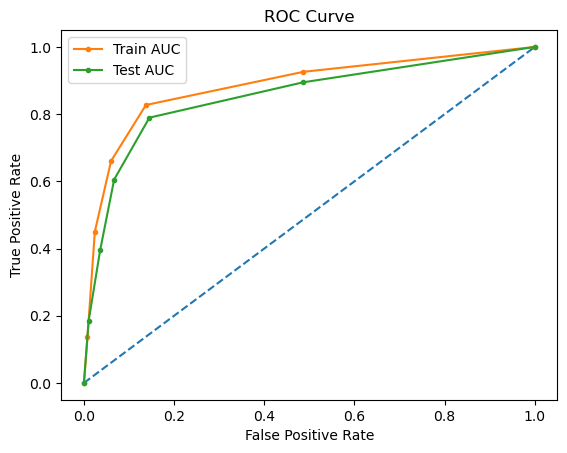

In [82]:
custom_roc_curve(model_k1,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1254
           1       0.22      0.24      0.23        38

    accuracy                           0.95      1292
   macro avg       0.60      0.61      0.60      1292
weighted avg       0.95      0.95      0.95      1292

KNeighborsClassifier accuracy_score= 95.27863777089783


array([[1222,   32],
       [  29,    9]], dtype=int64)

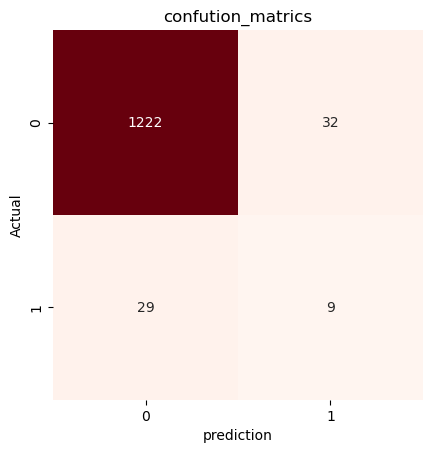

In [77]:
y5 = y5.values.ravel()
model_k1 = KNeighborsClassifier(n_neighbors=5,p=2)
model_k1.fit(x5,y5)
model_evaluation(model_k1,"KNeighborsClassifier",x_test,y_test)
conf_matrixs(y_test,model_k1,x_test,cmap='Reds',normalize=None,plot=True,encoded_labels=True)


**************************************************
Train AUC: 0.883
Test AUC: 0.852
**************************************************
Train Accuracy: 0.931
Test Accuracy: 0.923


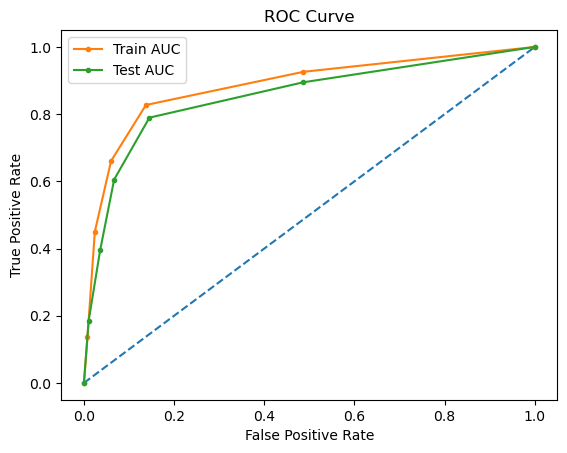

In [83]:
custom_roc_curve(model_k1,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1254
           1       0.16      0.11      0.13        38

    accuracy                           0.96      1292
   macro avg       0.57      0.54      0.55      1292
weighted avg       0.95      0.96      0.95      1292

KNeighborsClassifier accuracy_score= 95.74303405572755


array([[1233,   21],
       [  34,    4]], dtype=int64)

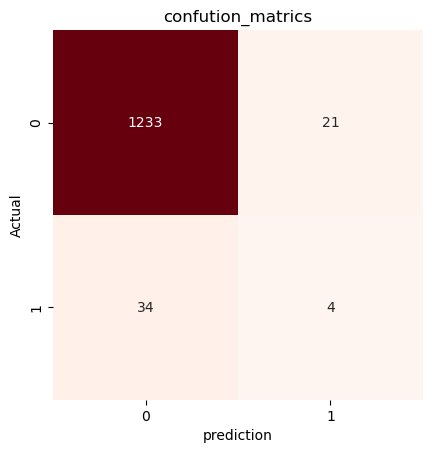

In [78]:
y6 = y6.values.ravel()
model_k1 = KNeighborsClassifier(n_neighbors=5,p=2)
model_k1.fit(x6,y6)
model_evaluation(model_k1,"KNeighborsClassifier",x_test,y_test)
conf_matrixs(y_test,model_k1,x_test,cmap='Reds',normalize=None,plot=True,encoded_labels=True)


**************************************************
Train AUC: 0.883
Test AUC: 0.852
**************************************************
Train Accuracy: 0.931
Test Accuracy: 0.923


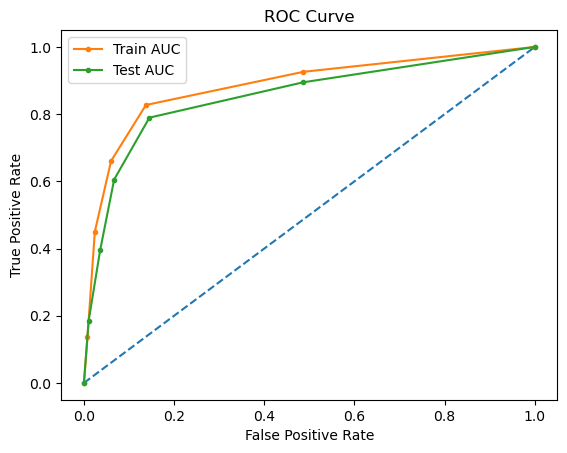

In [84]:
custom_roc_curve(model_k1,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1254
           1       0.21      0.61      0.32        38

    accuracy                           0.92      1292
   macro avg       0.60      0.77      0.64      1292
weighted avg       0.96      0.92      0.94      1292

KNeighborsClassifier accuracy_score= 92.3374613003096


array([[1170,   84],
       [  15,   23]], dtype=int64)

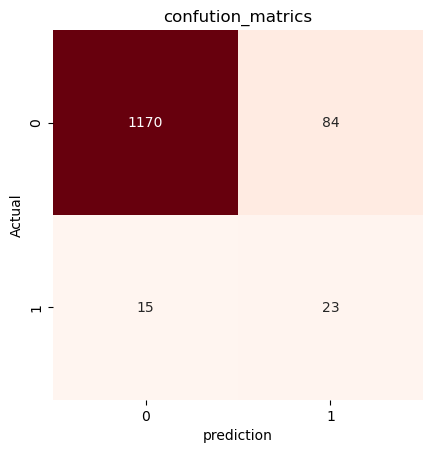

In [79]:
y7 = y7.values.ravel()
model_k1 = KNeighborsClassifier(n_neighbors=5,p=2)
model_k1.fit(x7,y7)
model_evaluation(model_k1,"KNeighborsClassifier",x_test,y_test)
conf_matrixs(y_test,model_k1,x_test,cmap='Reds',normalize=None,plot=True,encoded_labels=True)


**************************************************
Train AUC: 0.883
Test AUC: 0.852
**************************************************
Train Accuracy: 0.931
Test Accuracy: 0.923


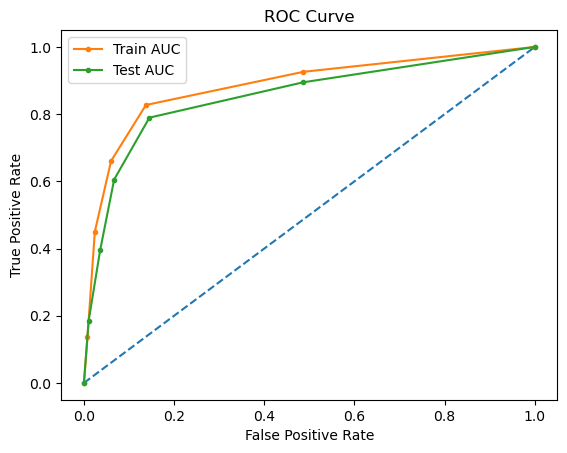

In [85]:
custom_roc_curve(model_k1,x_train,x_test,y_train,y_test)

 # NAIVE BAYES   

ITERATION 1

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1254
           1       0.27      0.55      0.37        38

    accuracy                           0.94      1292
   macro avg       0.63      0.75      0.67      1292
weighted avg       0.97      0.94      0.95      1292

 GaussianNB accuracy_score= 94.3498452012384


array([[1198,   56],
       [  17,   21]], dtype=int64)

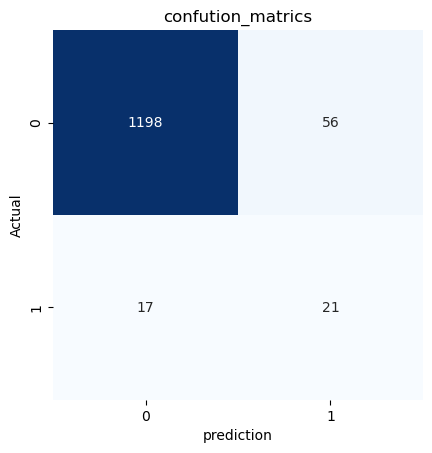

In [86]:
model_g1 = GaussianNB()
model_g1.fit(x_train,y_train)
model_evaluation(model_g1," GaussianNB",x_test,y_test)
conf_matrixs(y_test,model_g1,x_test,cmap='Blues',normalize=None,plot=True,encoded_labels=True)

**************************************************
Train AUC: 0.917
Test AUC: 0.873
**************************************************
Train Accuracy: 0.957
Test Accuracy: 0.943


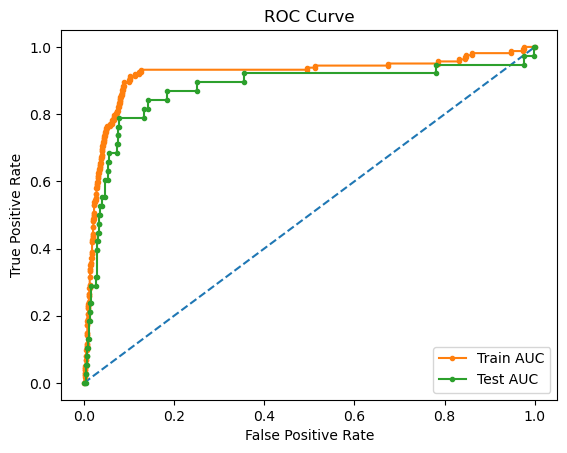

In [71]:
custom_roc_curve(model_g1,x_train,x_test,y_train,y_test)

ITERATION 2

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1254
           1       0.27      0.61      0.37        38

    accuracy                           0.94      1292
   macro avg       0.63      0.78      0.67      1292
weighted avg       0.97      0.94      0.95      1292

 GaussianNB accuracy_score= 94.04024767801857


array([[1192,   62],
       [  15,   23]], dtype=int64)

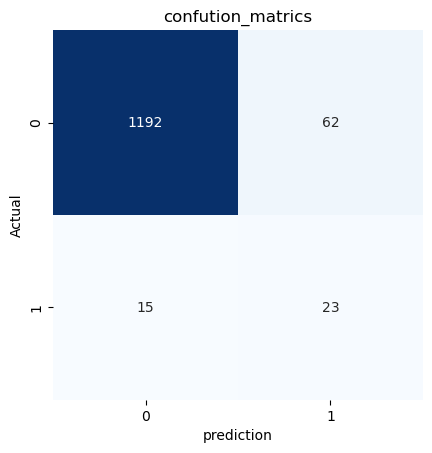

In [89]:
model_g1 = GaussianNB()
model_g1.fit(x2,y2)
model_evaluation(model_g1," GaussianNB",x_test,y_test)
conf_matrixs(y_test,model_g1,x_test,cmap='Blues',normalize=None,plot=True,encoded_labels=True)

**************************************************
Train AUC: 0.943
Test AUC: 0.916
**************************************************
Train Accuracy: 0.944
Test Accuracy: 0.940


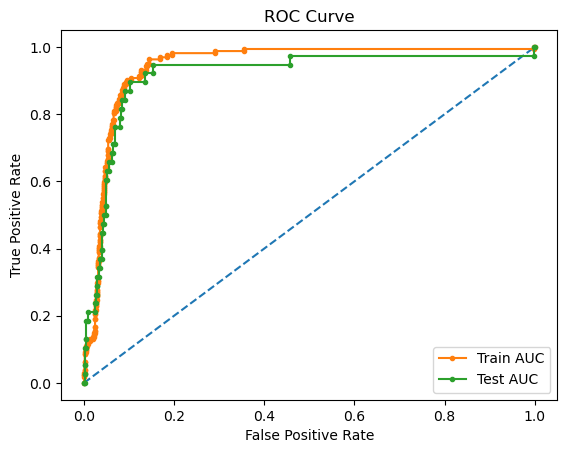

In [90]:
custom_roc_curve(model_g1,x_train,x_test,y_train,y_test)

ITERATION 3

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1254
           1       0.45      0.13      0.20        38

    accuracy                           0.97      1292
   macro avg       0.71      0.56      0.59      1292
weighted avg       0.96      0.97      0.96      1292

 GaussianNB accuracy_score= 96.9814241486068


array([[1248,    6],
       [  33,    5]], dtype=int64)

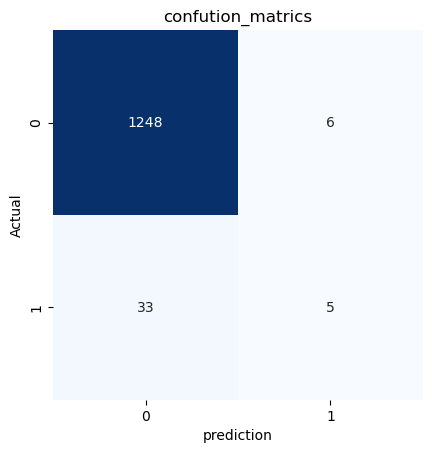

In [91]:
model_g1 = GaussianNB()
model_g1.fit(x3,y3)
model_evaluation(model_g1," GaussianNB",x_test,y_test)
conf_matrixs(y_test,model_g1,x_test,cmap='Blues',normalize=None,plot=True,encoded_labels=True)

**************************************************
Train AUC: 0.960
Test AUC: 0.926
**************************************************
Train Accuracy: 0.969
Test Accuracy: 0.970


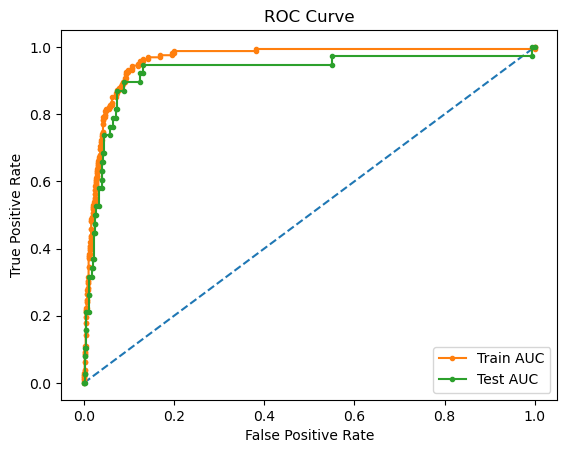

In [92]:
custom_roc_curve(model_g1,x_train,x_test,y_train,y_test)

ITERATION 4

              precision    recall  f1-score   support

           0       0.92      0.02      0.04      1254
           1       0.03      0.95      0.06        38

    accuracy                           0.05      1292
   macro avg       0.48      0.48      0.05      1292
weighted avg       0.90      0.05      0.04      1292

 GaussianNB accuracy_score= 4.643962848297214


array([[  24, 1230],
       [   2,   36]], dtype=int64)

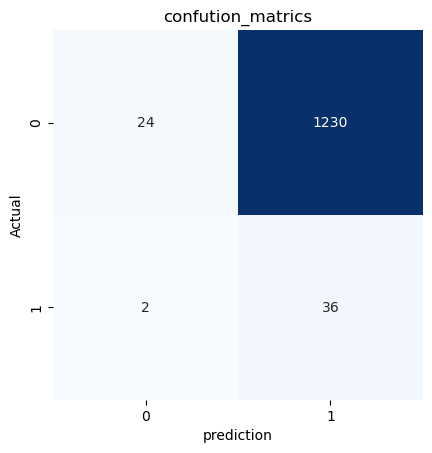

In [93]:
model_g1 = GaussianNB()
model_g1.fit(x4,y4)
model_evaluation(model_g1," GaussianNB",x_test,y_test)
conf_matrixs(y_test,model_g1,x_test,cmap='Blues',normalize=None,plot=True,encoded_labels=True)

**************************************************
Train AUC: 0.924
Test AUC: 0.898
**************************************************
Train Accuracy: 0.054
Test Accuracy: 0.046


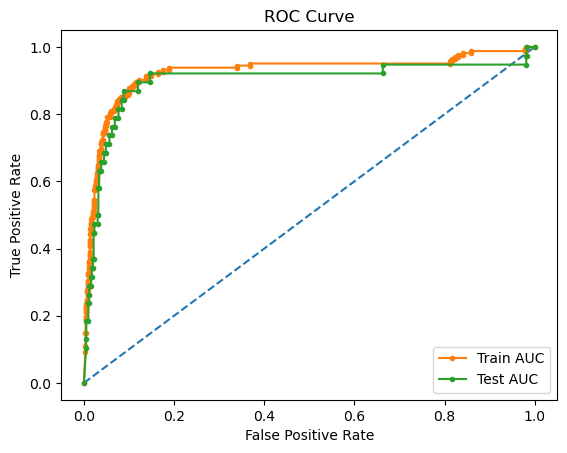

In [94]:
custom_roc_curve(model_g1,x_train,x_test,y_train,y_test)

ITERATION 5

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1254
           1       0.41      0.24      0.30        38

    accuracy                           0.97      1292
   macro avg       0.69      0.61      0.64      1292
weighted avg       0.96      0.97      0.96      1292

 GaussianNB accuracy_score= 96.74922600619195


array([[1241,   13],
       [  29,    9]], dtype=int64)

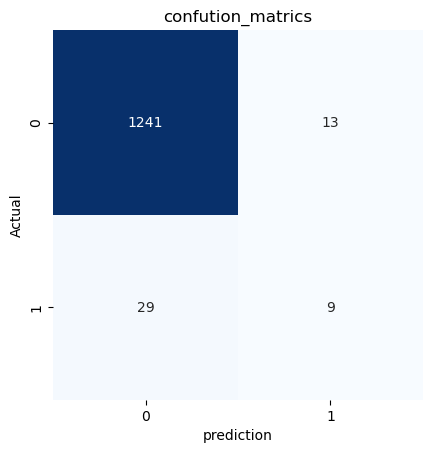

In [95]:
model_g1 = GaussianNB()
model_g1.fit(x5,y5)
model_evaluation(model_g1," GaussianNB",x_test,y_test)
conf_matrixs(y_test,model_g1,x_test,cmap='Blues',normalize=None,plot=True,encoded_labels=True)

**************************************************
Train AUC: 0.873
Test AUC: 0.905
**************************************************
Train Accuracy: 0.971
Test Accuracy: 0.967


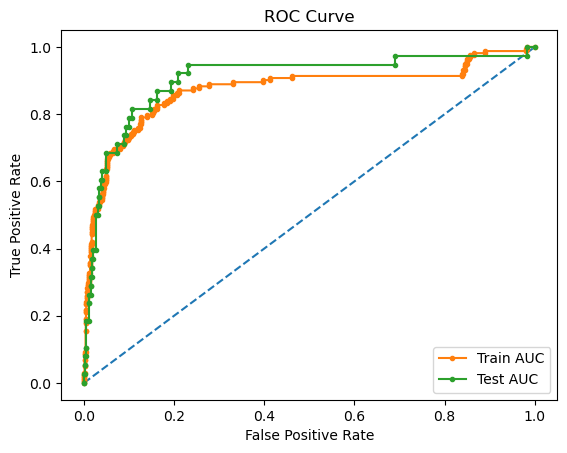

In [96]:
custom_roc_curve(model_g1,x_train,x_test,y_train,y_test)

ITERATION 6

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1254
           1       0.00      0.00      1.00        38

    accuracy                           0.97      1292
   macro avg       0.49      0.50      0.99      1292
weighted avg       0.94      0.97      0.99      1292

 GaussianNB accuracy_score= 96.9814241486068


array([[1253,    1],
       [  38,    0]], dtype=int64)

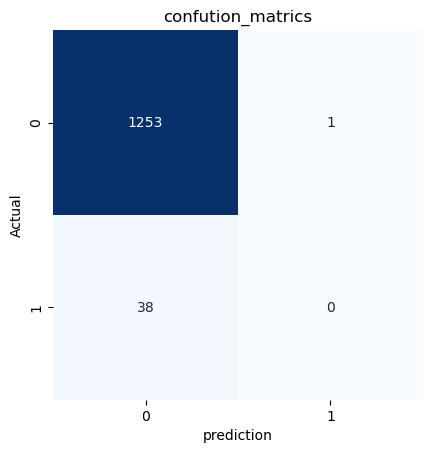

In [97]:
model_g1 = GaussianNB()
model_g1.fit(x6,y6)
model_evaluation(model_g1," GaussianNB",x_test,y_test)
conf_matrixs(y_test,model_g1,x_test,cmap='Blues',normalize=None,plot=True,encoded_labels=True)

**************************************************
Train AUC: 0.871
Test AUC: 0.853
**************************************************
Train Accuracy: 0.968
Test Accuracy: 0.970


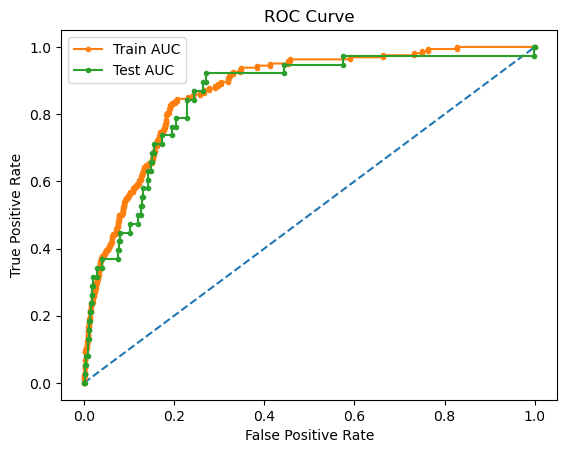

In [98]:
custom_roc_curve(model_g1,x_train,x_test,y_train,y_test)

ITERATION 7

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1254
           1       0.50      0.05      0.10        38

    accuracy                           0.97      1292
   macro avg       0.74      0.53      0.54      1292
weighted avg       0.96      0.97      0.96      1292

 GaussianNB accuracy_score= 97.05882352941177


array([[1252,    2],
       [  36,    2]], dtype=int64)

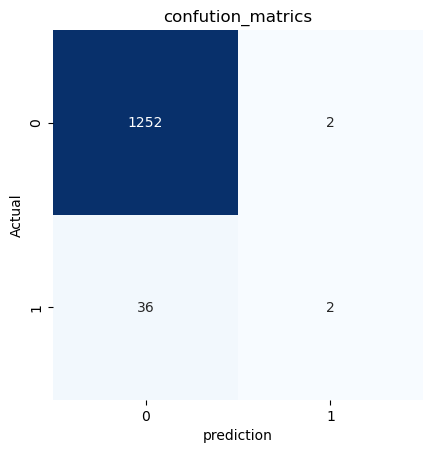

In [99]:
model_g1 = GaussianNB()
model_g1.fit(x7,y7)
model_evaluation(model_g1," GaussianNB",x_test,y_test)
conf_matrixs(y_test,model_g1,x_test,cmap='Blues',normalize=None,plot=True,encoded_labels=True)

**************************************************
Train AUC: 0.822
Test AUC: 0.862
**************************************************
Train Accuracy: 0.969
Test Accuracy: 0.971


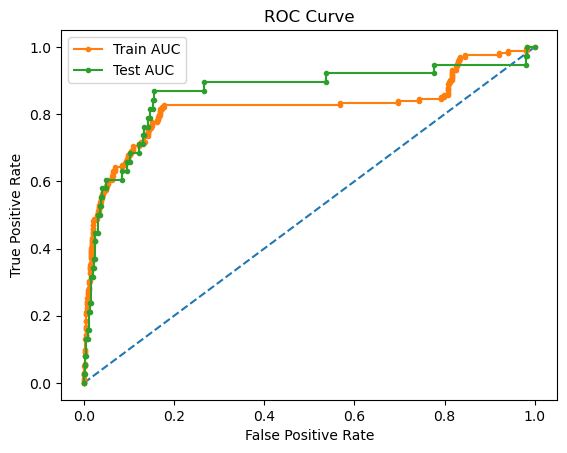

In [100]:
custom_roc_curve(model_g1,x_train,x_test,y_train,y_test)

# SUPPORT VECTOR MACHINE

ITERATION 1

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1254
           1       1.00      0.00      0.00        38

    accuracy                           0.97      1292
   macro avg       0.99      0.50      0.49      1292
weighted avg       0.97      0.97      0.96      1292

SVM accuracy_score= 97.05882352941177


array([[1254,    0],
       [  38,    0]], dtype=int64)

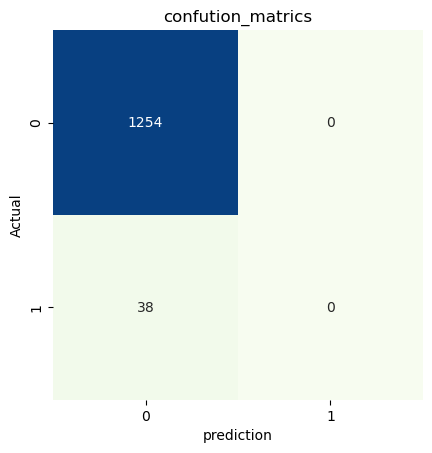

In [101]:
model_s1 = SVC()
model_s1.fit(x_train,y_train)
model_evaluation(model_s1,"SVM",x_test,y_test)
conf_matrixs(y_test,model_s1,x_test,cmap='GnBu',normalize=None,plot=True,encoded_labels=True)


ITERATION 2

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1254
           1       0.44      0.21      0.29        38

    accuracy                           0.97      1292
   macro avg       0.71      0.60      0.63      1292
weighted avg       0.96      0.97      0.96      1292

SVM accuracy_score= 96.90402476780186


array([[1244,   10],
       [  30,    8]], dtype=int64)

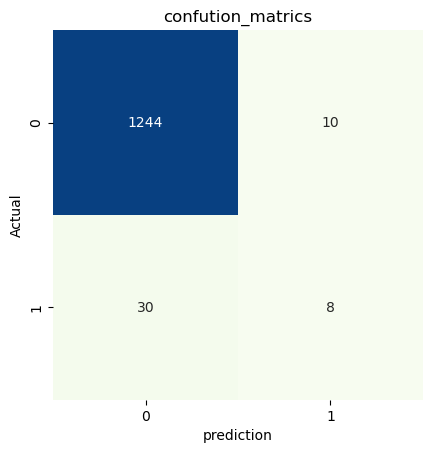

In [104]:
model_s1 = SVC()
model_s1.fit(x2,y2)
model_evaluation(model_s1,"SVM",x_test,y_test)
conf_matrixs(y_test,model_s1,x_test,cmap='GnBu',normalize=None,plot=True,encoded_labels=True)


ITERATION 3

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1254
           1       0.43      0.08      0.13        38

    accuracy                           0.97      1292
   macro avg       0.70      0.54      0.56      1292
weighted avg       0.96      0.97      0.96      1292

SVM accuracy_score= 96.9814241486068


array([[1250,    4],
       [  35,    3]], dtype=int64)

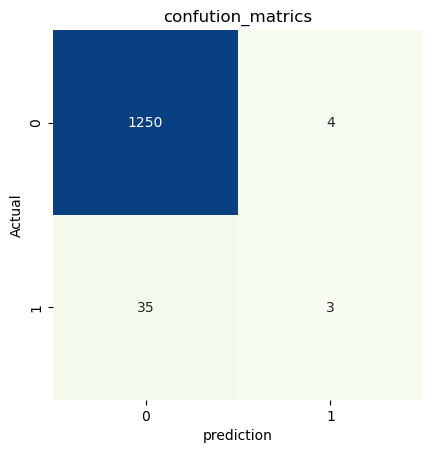

In [105]:
model_s1 = SVC()
model_s1.fit(x3,y3)
model_evaluation(model_s1,"SVM",x_test,y_test)
conf_matrixs(y_test,model_s1,x_test,cmap='GnBu',normalize=None,plot=True,encoded_labels=True)


ITERATION 4

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1254
           1       1.00      0.00      0.00        38

    accuracy                           0.97      1292
   macro avg       0.99      0.50      0.49      1292
weighted avg       0.97      0.97      0.96      1292

SVM accuracy_score= 97.05882352941177


array([[1254,    0],
       [  38,    0]], dtype=int64)

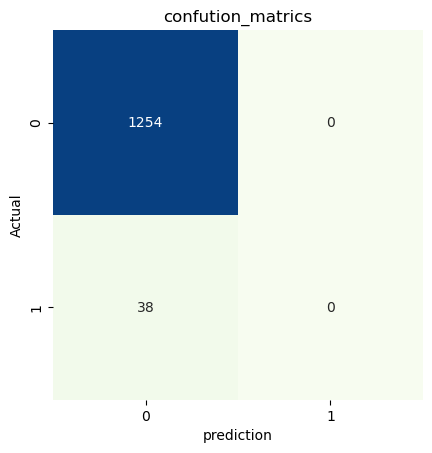

In [106]:
model_s1 = SVC()
model_s1.fit(x4,y4)
model_evaluation(model_s1,"SVM",x_test,y_test)
conf_matrixs(y_test,model_s1,x_test,cmap='GnBu',normalize=None,plot=True,encoded_labels=True)


ITERATION 5

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1254
           1       0.40      0.16      0.23        38

    accuracy                           0.97      1292
   macro avg       0.69      0.58      0.61      1292
weighted avg       0.96      0.97      0.96      1292

SVM accuracy_score= 96.8266253869969


array([[1245,    9],
       [  32,    6]], dtype=int64)

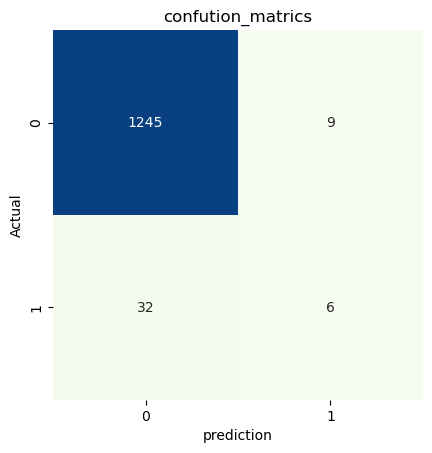

In [107]:
model_s1 = SVC()
model_s1.fit(x5,y5)
model_evaluation(model_s1,"SVM",x_test,y_test)
conf_matrixs(y_test,model_s1,x_test,cmap='GnBu',normalize=None,plot=True,encoded_labels=True)


ITERATION 6

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1254
           1       0.36      0.37      0.36        38

    accuracy                           0.96      1292
   macro avg       0.67      0.67      0.67      1292
weighted avg       0.96      0.96      0.96      1292

SVM accuracy_score= 96.20743034055728


array([[1229,   25],
       [  24,   14]], dtype=int64)

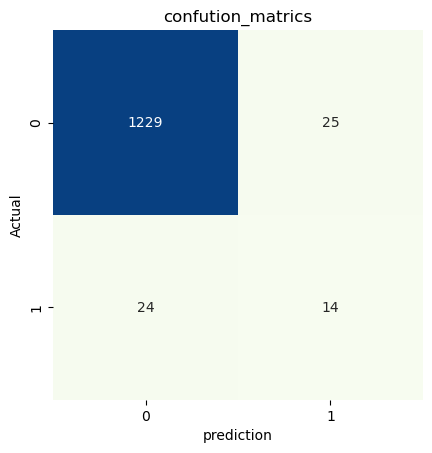

In [108]:
model_s1 = SVC()
model_s1.fit(x6,y6)
model_evaluation(model_s1,"SVM",x_test,y_test)
conf_matrixs(y_test,model_s1,x_test,cmap='GnBu',normalize=None,plot=True,encoded_labels=True)


ITERATION 7

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1254
           1       0.26      0.84      0.40        38

    accuracy                           0.92      1292
   macro avg       0.63      0.88      0.68      1292
weighted avg       0.97      0.92      0.94      1292

SVM accuracy_score= 92.41486068111455


array([[1162,   92],
       [   6,   32]], dtype=int64)

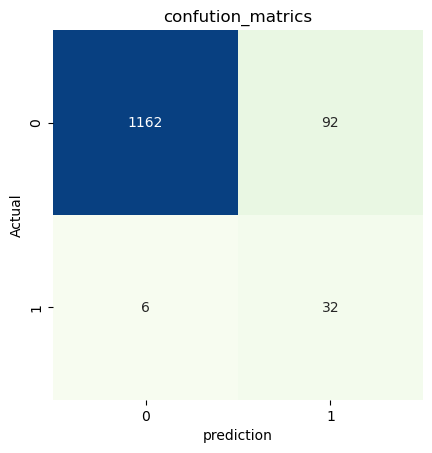

In [109]:
model_s1 = SVC()
model_s1.fit(x7,y7)
model_evaluation(model_s1,"SVM",x_test,y_test)
conf_matrixs(y_test,model_s1,x_test,cmap='GnBu',normalize=None,plot=True,encoded_labels=True)


# LOGESTIC REGRESSION

ITERATION 1

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1254
           1       0.43      0.24      0.31        38

    accuracy                           0.97      1292
   macro avg       0.70      0.61      0.64      1292
weighted avg       0.96      0.97      0.96      1292

LOGESTIC REGRESSION accuracy_score= 96.8266253869969


array([[1242,   12],
       [  29,    9]], dtype=int64)

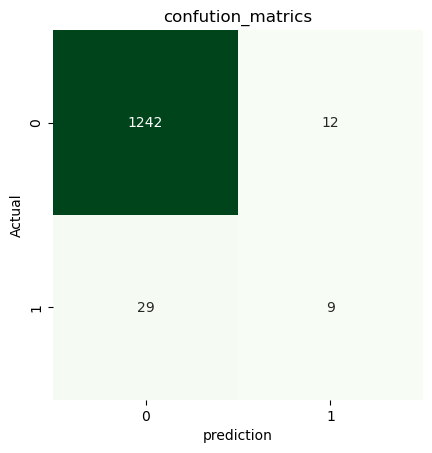

In [111]:
model_l1 =  LogisticRegression(solver='lbfgs',max_iter=1000)
model_l1.fit(x_train,y_train)
model_evaluation(model_l1,"LOGESTIC REGRESSION",x_test,y_test)
conf_matrixs(y_test,model_l1,x_test,cmap="Greens",normalize=None,plot=True,encoded_labels=True)

**************************************************
Train AUC: 0.969
Test AUC: 0.931
**************************************************
Train Accuracy: 0.970
Test Accuracy: 0.968


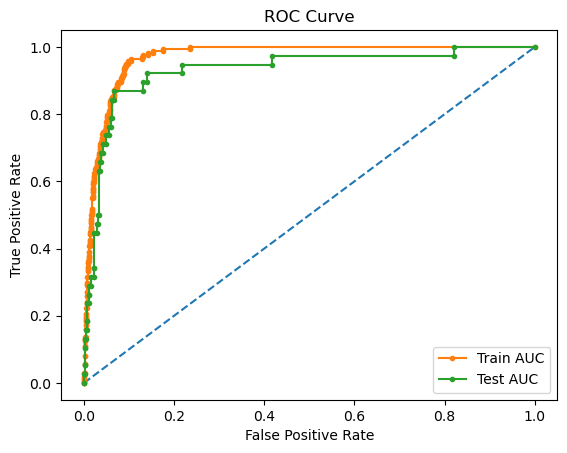

In [112]:
custom_roc_curve(model_l1,x_train,x_test,y_train,y_test)

ITERATION 2

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1254
           1       0.43      0.32      0.36        38

    accuracy                           0.97      1292
   macro avg       0.70      0.65      0.67      1292
weighted avg       0.96      0.97      0.97      1292

LOGESTIC REGRESSION accuracy_score= 96.74922600619195


array([[1238,   16],
       [  26,   12]], dtype=int64)

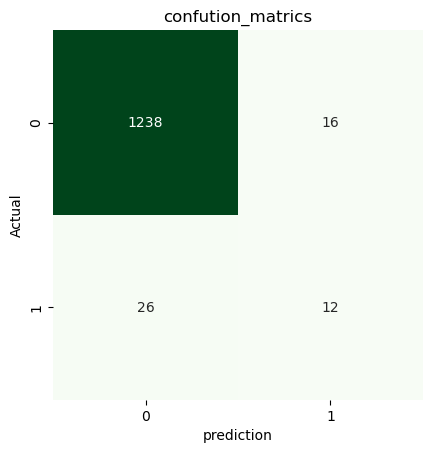

In [114]:
model_l1 =  LogisticRegression(solver='lbfgs',max_iter=1000)
model_l1.fit(x2,y2)
model_evaluation(model_l1,"LOGESTIC REGRESSION",x_test,y_test)
conf_matrixs(y_test,model_l1,x_test,cmap="Greens",normalize=None,plot=True,encoded_labels=True)

**************************************************
Train AUC: 0.970
Test AUC: 0.956
**************************************************
Train Accuracy: 0.969
Test Accuracy: 0.967


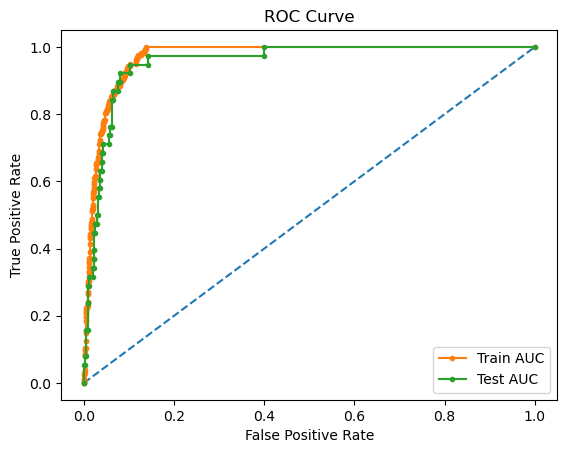

In [115]:
custom_roc_curve(model_l1,x_train,x_test,y_train,y_test)

ITERATION 3

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1254
           1       0.42      0.26      0.32        38

    accuracy                           0.97      1292
   macro avg       0.70      0.63      0.65      1292
weighted avg       0.96      0.97      0.96      1292

LOGESTIC REGRESSION accuracy_score= 96.74922600619195


array([[1240,   14],
       [  28,   10]], dtype=int64)

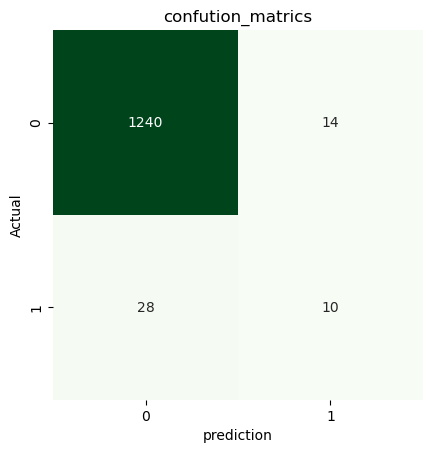

In [116]:
model_l1 =  LogisticRegression(solver='lbfgs',max_iter=1000)
model_l1.fit(x3,y3)
model_evaluation(model_l1,"LOGESTIC REGRESSION",x_test,y_test)
conf_matrixs(y_test,model_l1,x_test,cmap="Greens",normalize=None,plot=True,encoded_labels=True)

**************************************************
Train AUC: 0.971
Test AUC: 0.955
**************************************************
Train Accuracy: 0.970
Test Accuracy: 0.967


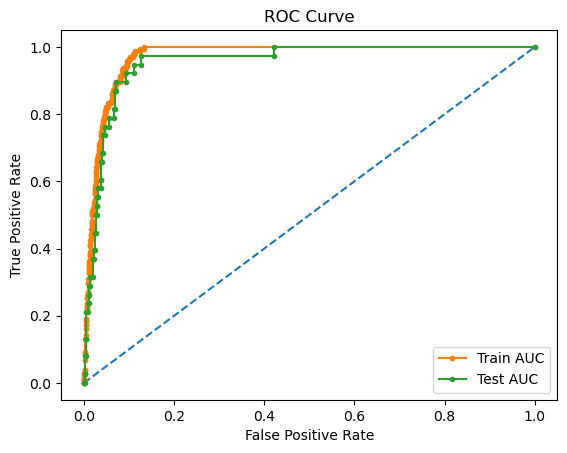

In [117]:
custom_roc_curve(model_l1,x_train,x_test,y_train,y_test)

ITERATION 4

              precision    recall  f1-score   support

           0       1.00      0.69      0.81      1254
           1       0.09      0.97      0.16        38

    accuracy                           0.69      1292
   macro avg       0.54      0.83      0.49      1292
weighted avg       0.97      0.69      0.79      1292

LOGESTIC REGRESSION accuracy_score= 69.42724458204334


array([[860, 394],
       [  1,  37]], dtype=int64)

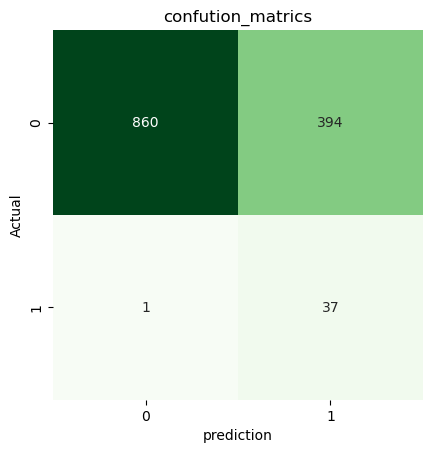

In [118]:
model_l1 =  LogisticRegression(solver='lbfgs',max_iter=1000)
model_l1.fit(x4,y4)
model_evaluation(model_l1,"LOGESTIC REGRESSION",x_test,y_test)
conf_matrixs(y_test,model_l1,x_test,cmap="Greens",normalize=None,plot=True,encoded_labels=True)

**************************************************
Train AUC: 0.968
Test AUC: 0.952
**************************************************
Train Accuracy: 0.714
Test Accuracy: 0.694


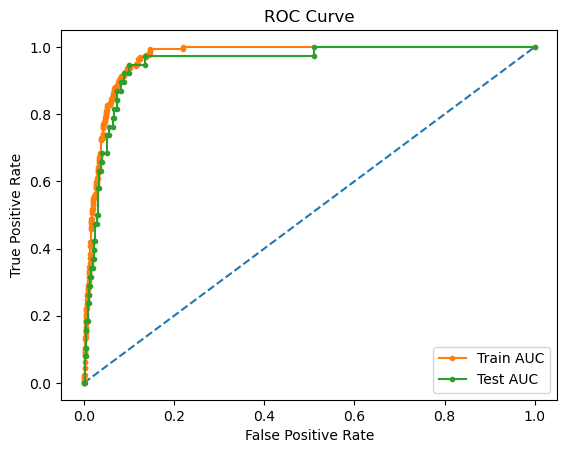

In [119]:
custom_roc_curve(model_l1,x_train,x_test,y_train,y_test)

ITERATION 5

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1254
           1       0.40      0.16      0.23        38

    accuracy                           0.97      1292
   macro avg       0.69      0.58      0.61      1292
weighted avg       0.96      0.97      0.96      1292

LOGESTIC REGRESSION accuracy_score= 96.8266253869969


array([[1245,    9],
       [  32,    6]], dtype=int64)

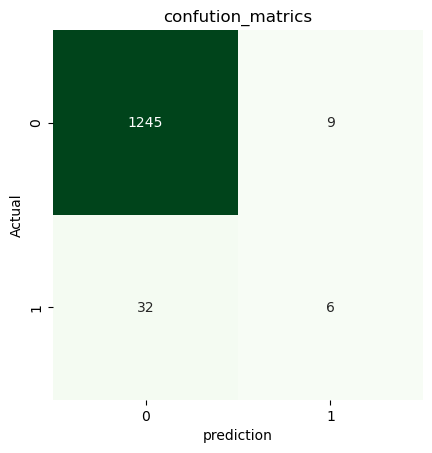

In [120]:
model_l1 =  LogisticRegression(solver='lbfgs',max_iter=1000)
model_l1.fit(x5,y5)
model_evaluation(model_l1,"LOGESTIC REGRESSION",x_test,y_test)
conf_matrixs(y_test,model_l1,x_test,cmap="Greens",normalize=None,plot=True,encoded_labels=True)

**************************************************
Train AUC: 0.953
Test AUC: 0.929
**************************************************
Train Accuracy: 0.969
Test Accuracy: 0.968


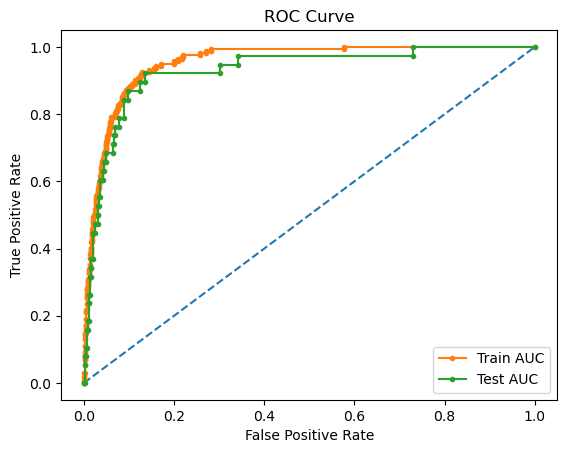

In [121]:
custom_roc_curve(model_l1,x_train,x_test,y_train,y_test)

ITERATION 6

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1254
           1       0.40      0.32      0.35        38

    accuracy                           0.97      1292
   macro avg       0.69      0.65      0.67      1292
weighted avg       0.96      0.97      0.96      1292

LOGESTIC REGRESSION accuracy_score= 96.59442724458205


array([[1236,   18],
       [  26,   12]], dtype=int64)

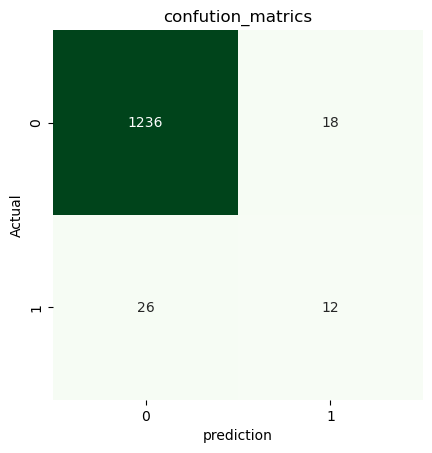

In [122]:
model_l1 =  LogisticRegression(solver='lbfgs',max_iter=1000)
model_l1.fit(x6,y6)
model_evaluation(model_l1,"LOGESTIC REGRESSION",x_test,y_test)
conf_matrixs(y_test,model_l1,x_test,cmap="Greens",normalize=None,plot=True,encoded_labels=True)

**************************************************
Train AUC: 0.953
Test AUC: 0.933
**************************************************
Train Accuracy: 0.967
Test Accuracy: 0.966


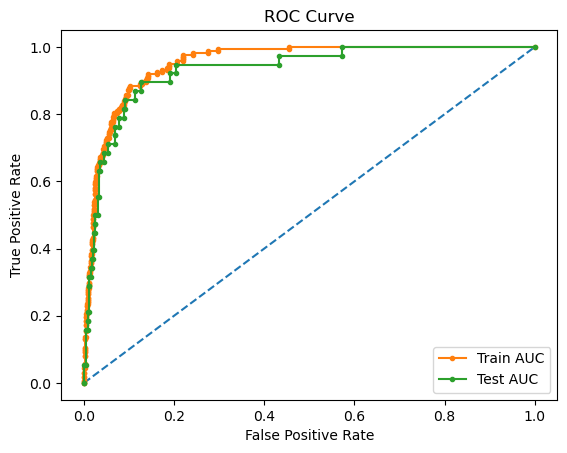

In [123]:
custom_roc_curve(model_l1,x_train,x_test,y_train,y_test)

ITERATION 7

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1254
           1       0.36      0.58      0.44        38

    accuracy                           0.96      1292
   macro avg       0.67      0.77      0.71      1292
weighted avg       0.97      0.96      0.96      1292

LOGESTIC REGRESSION accuracy_score= 95.74303405572755


array([[1215,   39],
       [  16,   22]], dtype=int64)

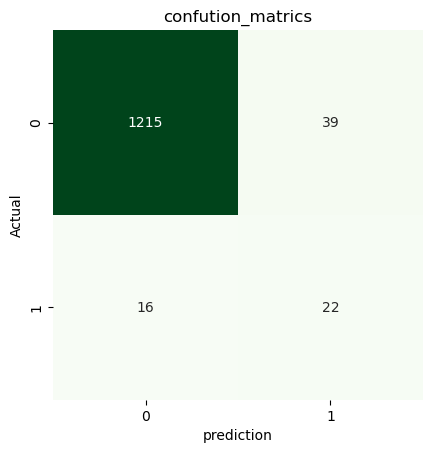

In [124]:
model_l1 =  LogisticRegression(solver='lbfgs',max_iter=1000)
model_l1.fit(x7,y7)
model_evaluation(model_l1,"LOGESTIC REGRESSION",x_test,y_test)
conf_matrixs(y_test,model_l1,x_test,cmap="Greens",normalize=None,plot=True,encoded_labels=True)

**************************************************
Train AUC: 0.967
Test AUC: 0.926
**************************************************
Train Accuracy: 0.964
Test Accuracy: 0.957


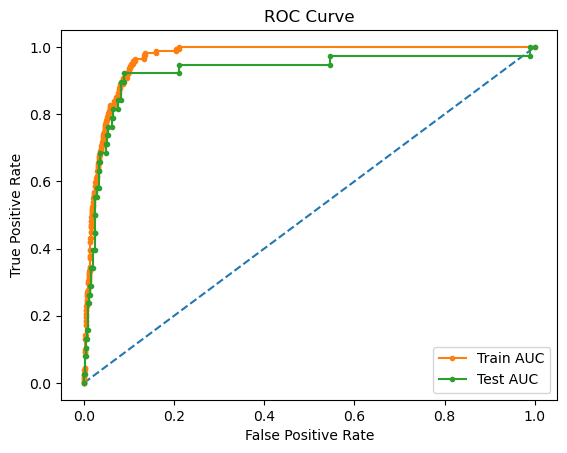

In [125]:
custom_roc_curve(model_l1,x_train,x_test,y_train,y_test)

# RANDOM SAMPLE TESTING

In [127]:
test_x = clean_ds.copy()

In [128]:
test_x.drop(columns=['y'],axis=1,inplace=True)

In [129]:
test_y = clean_ds.iloc[:,[6]]


In [130]:
x_train_t,x_test_t,y_train_t,y_test_t = train_test_split(test_x,test_y,test_size=0.2,random_state=127)

# ITERATION MODEL TESTING¶

KNN

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      8023
           1       0.33      0.67      0.44      1020

    accuracy                           0.81      9043
   macro avg       0.64      0.75      0.66      9043
weighted avg       0.88      0.81      0.83      9043

KNN accuracy_score= 80.68118987061816


array([[6615, 1408],
       [ 339,  681]], dtype=int64)

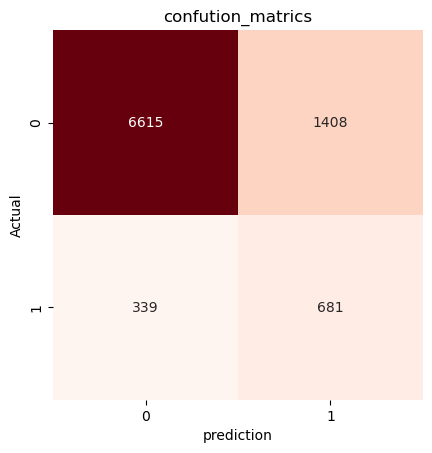

In [131]:
model_evaluation(model_k1,"KNN",x_test_t,y_test_t)
conf_matrixs(y_test_t,model_k1,x_test_t,cmap='Reds',normalize=None,plot=True,encoded_labels=True)


**************************************************
Train AUC: 0.829
Test AUC: 0.830
**************************************************
Train Accuracy: 0.808
Test Accuracy: 0.807


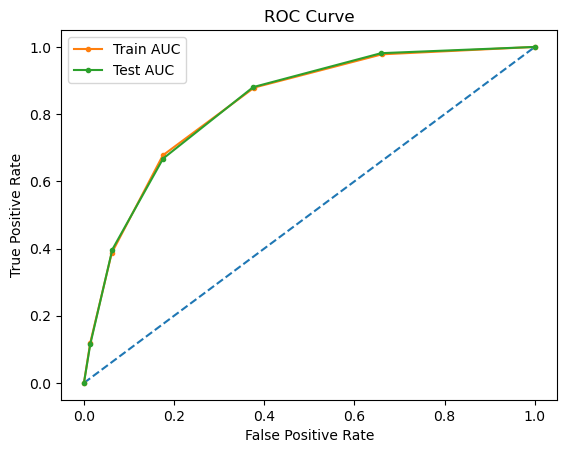

In [132]:
custom_roc_curve(model_k1,x_train_t,x_test_t,y_train_t,y_test_t)

NAIVE BAYES

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      8023
           1       0.26      0.68      0.38      1020

    accuracy                           0.74      9043
   macro avg       0.60      0.72      0.61      9043
weighted avg       0.87      0.74      0.79      9043

 GaussianNB accuracy_score= 74.45537985181907


array([[6039, 1984],
       [ 326,  694]], dtype=int64)

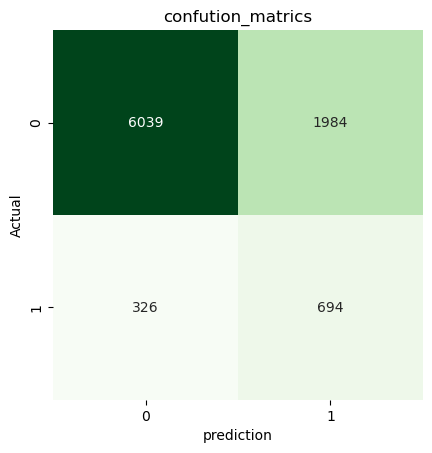

In [133]:
model_evaluation(model_g1," GaussianNB",x_test_t,y_test_t)
conf_matrixs(y_test_t,model_g1,x_test_t,cmap='Greens',normalize=None,plot=True,encoded_labels=True)


**************************************************
Train AUC: 0.799
Test AUC: 0.789
**************************************************
Train Accuracy: 0.752
Test Accuracy: 0.745


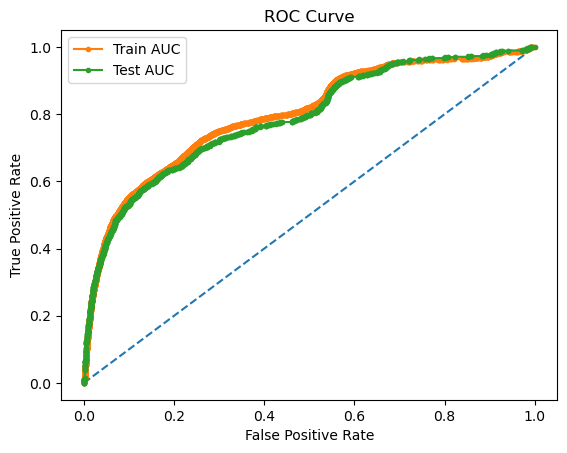

In [134]:
custom_roc_curve(model_g1,x_train_t,x_test_t,y_train_t,y_test_t)

SVM

              precision    recall  f1-score   support

           0       0.95      0.86      0.91      8023
           1       0.39      0.67      0.49      1020

    accuracy                           0.84      9043
   macro avg       0.67      0.77      0.70      9043
weighted avg       0.89      0.84      0.86      9043

SVM accuracy_score= 84.23089682627447


array([[6935, 1088],
       [ 338,  682]], dtype=int64)

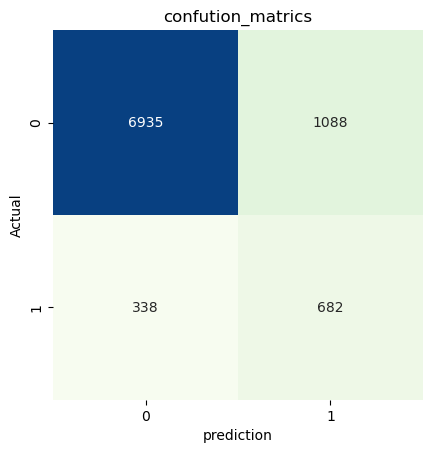

In [135]:
model_evaluation(model_s1,"SVM",x_test_t,y_test_t)
conf_matrixs(y_test_t,model_s1,x_test_t,cmap='GnBu',normalize=None,plot=True,encoded_labels=True)

LOGESTIC REGRESSION

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      8023
           1       0.49      0.55      0.52      1020

    accuracy                           0.89      9043
   macro avg       0.72      0.74      0.73      9043
weighted avg       0.89      0.89      0.89      9043

LOGESTIC_REGRESSION_TESTING accuracy_score= 88.57679973460135


array([[7444,  579],
       [ 454,  566]], dtype=int64)

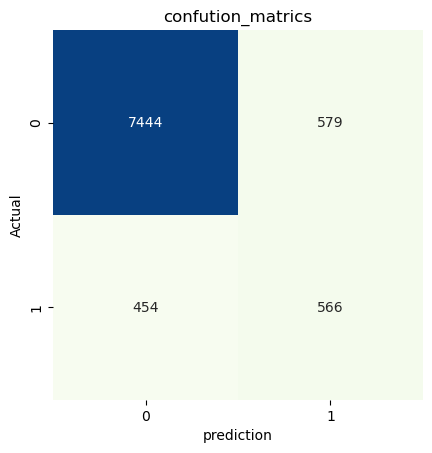

In [137]:
model_evaluation(model_l1,"LOGESTIC_REGRESSION_TESTING",x_test_t,y_test_t)
conf_matrixs(y_test_t,model_l1,x_test_t,cmap='GnBu',normalize=None,plot=True,encoded_labels=True)

**************************************************
Train AUC: 0.885
Test AUC: 0.880
**************************************************
Train Accuracy: 0.886
Test Accuracy: 0.886


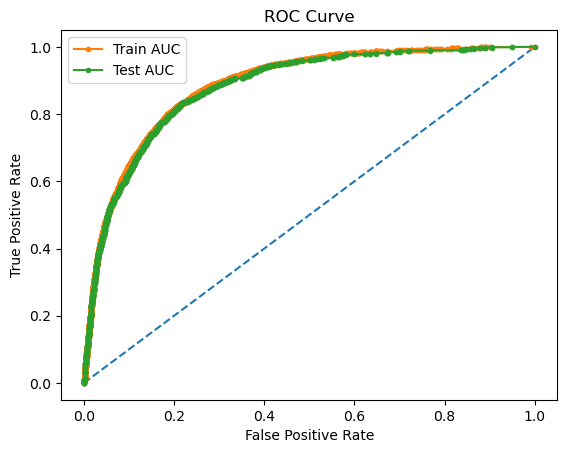

In [138]:
custom_roc_curve(model_l1,x_train_t,x_test_t,y_train_t,y_test_t)

# TOTAL SAMPLE TESTING¶

In [139]:
dt  = clean_ds.copy()

In [140]:
dt.drop(columns=['y'],axis= 1,inplace=True)
y_t = clean_ds.iloc[:,[6]]

In [141]:
X_train,X_test,Y_train,Y_test = train_test_split(dt,y_t,test_size=0.2,random_state=127)

KNN

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8023
           1       0.55      0.38      0.45      1020

    accuracy                           0.90      9043
   macro avg       0.74      0.67      0.70      9043
weighted avg       0.88      0.90      0.89      9043

KNeighborsClassifier accuracy_score= 89.53886984407829


array([[7709,  314],
       [ 632,  388]], dtype=int64)

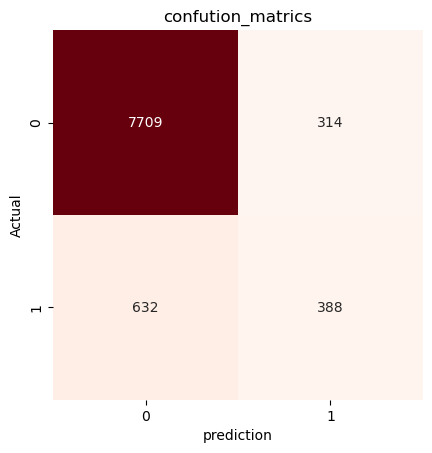

In [142]:
Y_train = Y_train.values.ravel()
Y_test = Y_test.values.ravel()
model_kt = KNeighborsClassifier(n_neighbors=5,p=2)
model_kt.fit(X_train,Y_train)
model_evaluation(model_kt,"KNeighborsClassifier",X_test,Y_test)
conf_matrixs(Y_test,model_kt,X_test,cmap='Reds',normalize=None,plot=True,encoded_labels=True)

**************************************************
Train AUC: 0.961
Test AUC: 0.851
**************************************************
Train Accuracy: 0.925
Test Accuracy: 0.895


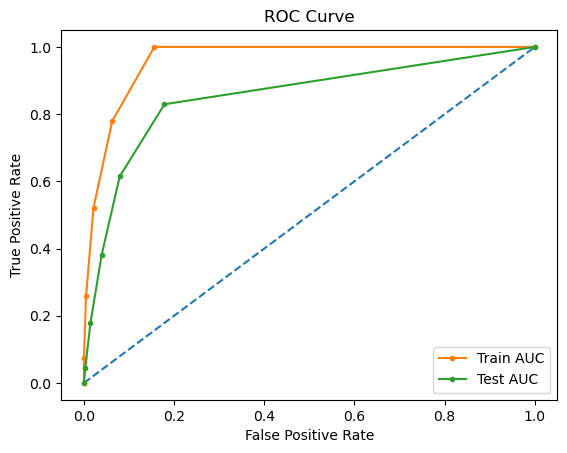

In [143]:
custom_roc_curve(model_kt,X_train,X_test,Y_train,Y_test)

NAIVE BAYES

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      8023
           1       0.42      0.53      0.47      1020

    accuracy                           0.87      9043
   macro avg       0.68      0.72      0.70      9043
weighted avg       0.88      0.87      0.87      9043

 GaussianNB accuracy_score= 86.54207674444322


array([[7284,  739],
       [ 478,  542]], dtype=int64)

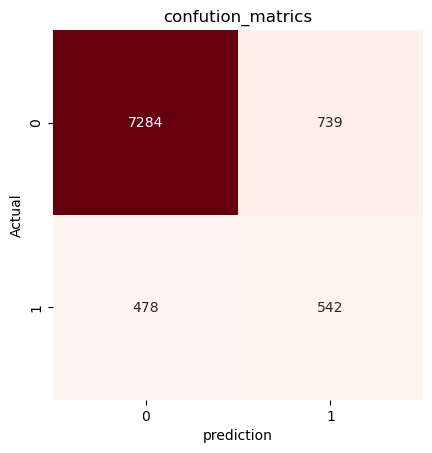

In [144]:
model_gt = GaussianNB()
model_gt.fit(X_train,Y_train)
model_evaluation(model_gt," GaussianNB",X_test,Y_test)
conf_matrixs(Y_test,model_gt,X_test,cmap='Reds',normalize=None,plot=True,encoded_labels=True)


**************************************************
Train AUC: 0.827
Test AUC: 0.823
**************************************************
Train Accuracy: 0.868
Test Accuracy: 0.865


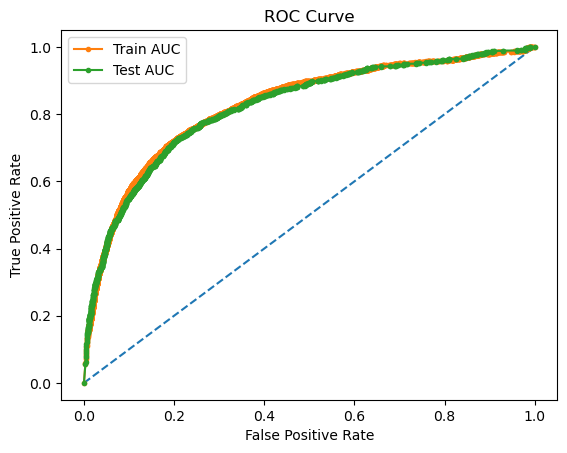

In [145]:
custom_roc_curve(model_gt,X_train,X_test,Y_train,Y_test)

SVM

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      8023
           1       0.67      0.28      0.39      1020

    accuracy                           0.90      9043
   macro avg       0.79      0.63      0.67      9043
weighted avg       0.89      0.90      0.89      9043

SVM accuracy_score= 90.34612407386929


array([[7886,  137],
       [ 736,  284]], dtype=int64)

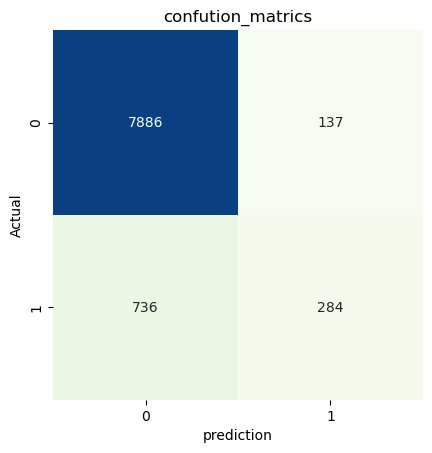

In [146]:
model_st = SVC()
model_st.fit(X_train,Y_train)
model_evaluation(model_st,"SVM",X_test,Y_test)
conf_matrixs(Y_test,model_st,X_test,cmap='GnBu',normalize=None,plot=True,encoded_labels=True)

LOGESTIC REGRESSION

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8023
           1       0.64      0.33      0.44      1020

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.89      0.90      0.89      9043

LOGESTIC REGRESSION accuracy_score= 90.32400751962845


array([[7831,  192],
       [ 683,  337]], dtype=int64)

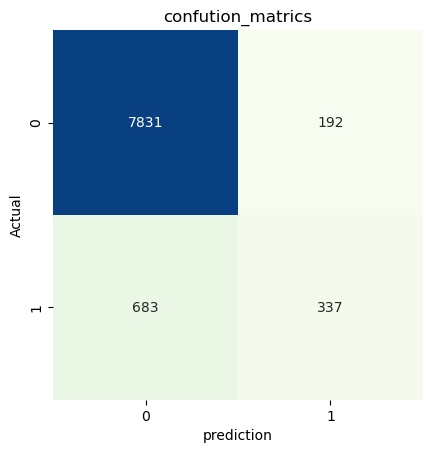

In [147]:
model_lt =  LogisticRegression(solver='lbfgs',max_iter=1000)
model_lt.fit(X_train,Y_train)
model_evaluation(model_lt,"LOGESTIC REGRESSION",X_test,Y_test)
conf_matrixs(Y_test,model_lt,X_test,cmap='GnBu',normalize=None,plot=True,encoded_labels=True)

**************************************************
Train AUC: 0.891
Test AUC: 0.884
**************************************************
Train Accuracy: 0.899
Test Accuracy: 0.903


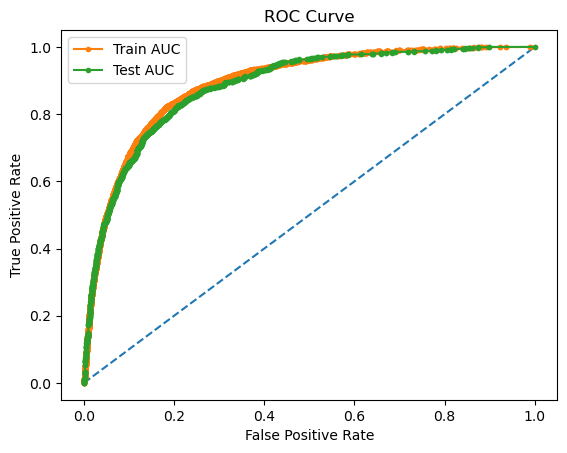

In [148]:
custom_roc_curve(model_lt,X_train,X_test,Y_train,Y_test)

# CONCLUTION
## 1.Summary of Findings:
Begin by summarizing the key findings from your data analysis. Highlight any significant trends, patterns, or insights that you discovered through your visualizations

## 2.Visualization Impact:
Discuss the impact of your visualizations on the overall understanding of the data. Emphasize how visual representations helped in conveying complex information and making the findings more accessible

## 3.Rationale for Sample Separation:
Explain why you chose to separate your data into seven samples. Was it based on specific criteria, such as time periods, geographical locations, or other relevant factors? Clarify the rationale behind this decision

## 4.Key Findings Across Samples:
Summarize the key findings from each of the seven samples. Highlight any commonalities or differences observed across the samples. This can provide insights into the variability or consistency of your results

## 5.Comparative Analysis:
Discuss how the separation into seven samples allowed you to perform a comparative analysis. Did you identify trends or patterns that were consistent across multiple samples? Did certain samples exhibit unique characteristics

## V6.Statistical Significance:
If applicable, discuss the statistical significance of your findings. Are the patterns observed in each sample statistically significant, and what does this mean for the overall reliability of your results

## 7.Iterative Modeling Approach:
Explain the rationale behind the iterative fitting of your model. Did you refine parameters, features, or other aspects of the model in each iteration? Detail any adjustments made to enhance model performance.## 8.Evolution of ROC-AUC Curves: Discuss how the ROC-AUC curves evolved throughout the iterations. Highlight any improvements or changes in model performance. Did you observe convergence or stabilization of the curves over time

## 9.Performance Metrics:
Besides ROC-AUC, mention other relevant performance metrics you considered during the iterative process. This could include accuracy, precision, recall, or F1 score. Discuss how these metrics influenced your decisions in each iteration

## 10.Decision-Making Criteria:
Explain the criteria you used to make decisions about model adjustments. Were there specific thresholds or benchmarks you aimed to achieve in terms of ROC-AUC or other metrics? Clarify how these criteria guided your model refinement

## .Challenges and Learnings:
Discuss any challenges encountered during the iterative process. This could include issues related to overfitting, underfitting, or data-specific challenges. Highlight what you learned from each iteration and how it influenced subsequent model adjustments.## 12.Future Model Refinement: Provide insights into potential future directions for model refinement. Are there additional features or data preprocessing steps that could further enhance performance? Consider any avenues for ongoing improvement. ..?? ??....

